In [1]:
#importing of libraries

#Basic libraries
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier

#To ignore warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the data
df = pd.read_csv('C:/Users/tejad/OneDrive/Desktop/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#checking the shape
df.shape

(284807, 31)

In [4]:
#checking the null values if present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#checking the numerical value
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#checking the class distribution of the target variable
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<AxesSubplot:ylabel='Class'>

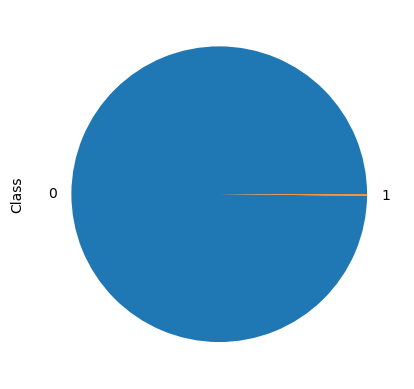

In [7]:
#checking the class distribution of the target variable in percentage
print((df.groupby('Class')['Class'].count()/df['Class'].count())*100)
((df.groupby('Class')['Class'].count()/df['Class'].count())*100).plot.pie()

In [8]:
#checking the % distribution of normal vs fraud
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


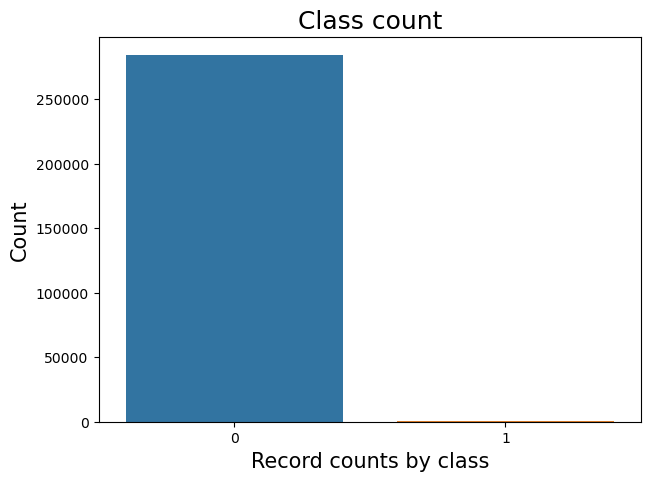

In [9]:
#creat a bar plot for the number and percentage of fraud vs non-fraud cases
plt.figure(figsize=(7,5))
sns.countplot(df['Class'])
plt.title("Class count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [10]:
#Checking the correlation
corr=df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


<function matplotlib.pyplot.show(close=None, block=None)>

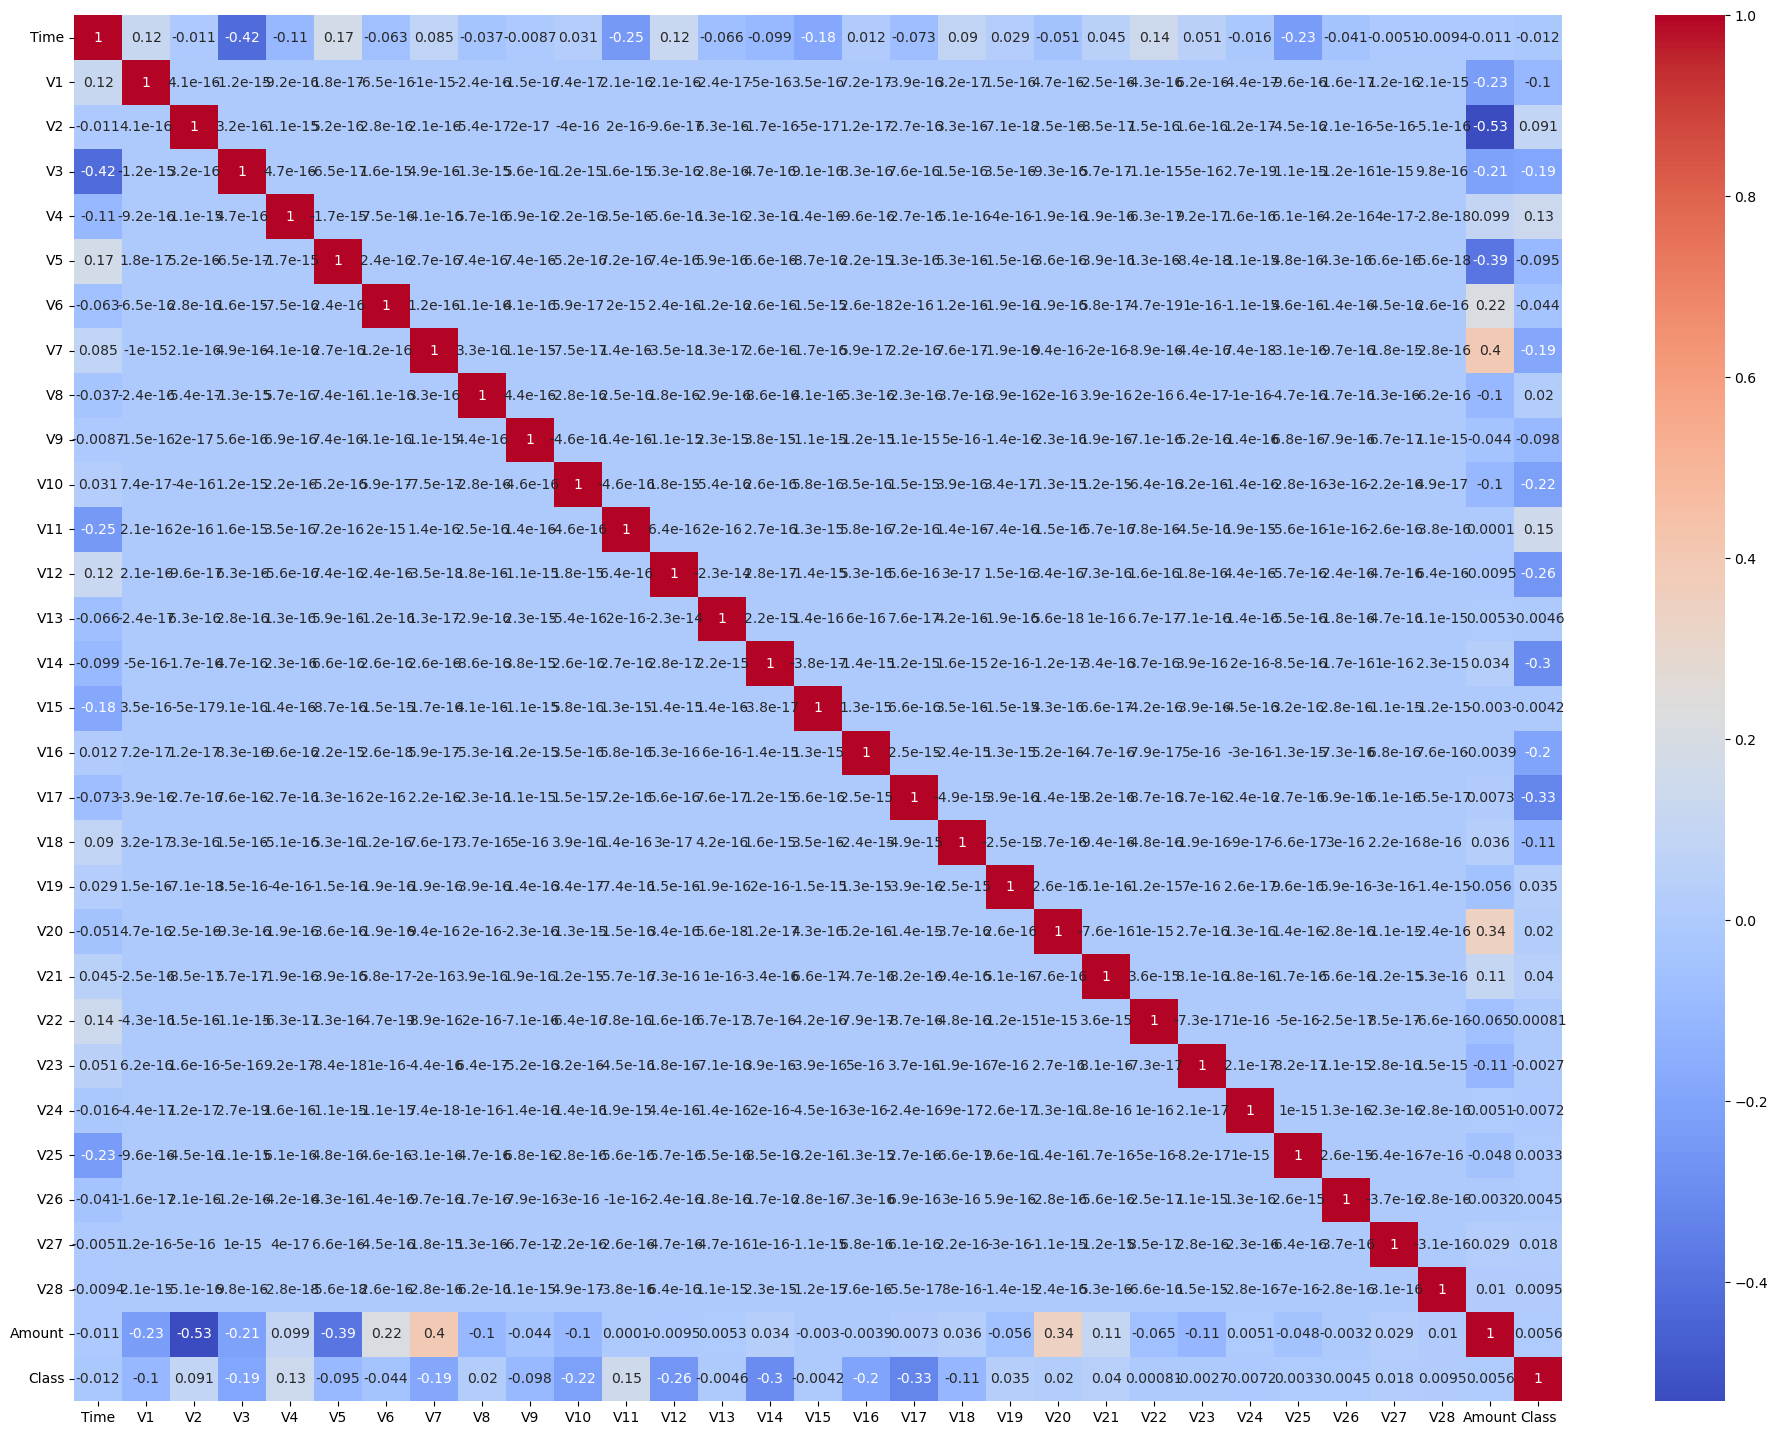

In [11]:
#checking for the correlation in heatamp
plt.figure(figsize=(24,18))

sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show

In [12]:
Delta_Time = pd.to_timedelta(df['Time'], unit='s')

#creating derived columns mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hours'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.days).astype(int)

In [13]:
#Drop unnecessary columns
#drop time as we have derived the required details

df.drop('Time', axis = 1, inplace=True)

#only keeping hour
df.drop(['Time_Day','Time_Min'],axis = 1, inplace=True)

In [14]:
#splitting into test and tranning data set (x and y)
y= df['Class']
x= df.drop(['Class'], axis=1)

In [15]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hours
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=100, test_size=0.20)

In [18]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


In [19]:
#accumulating all the column names under one variable
cols = list(x.columns.values)

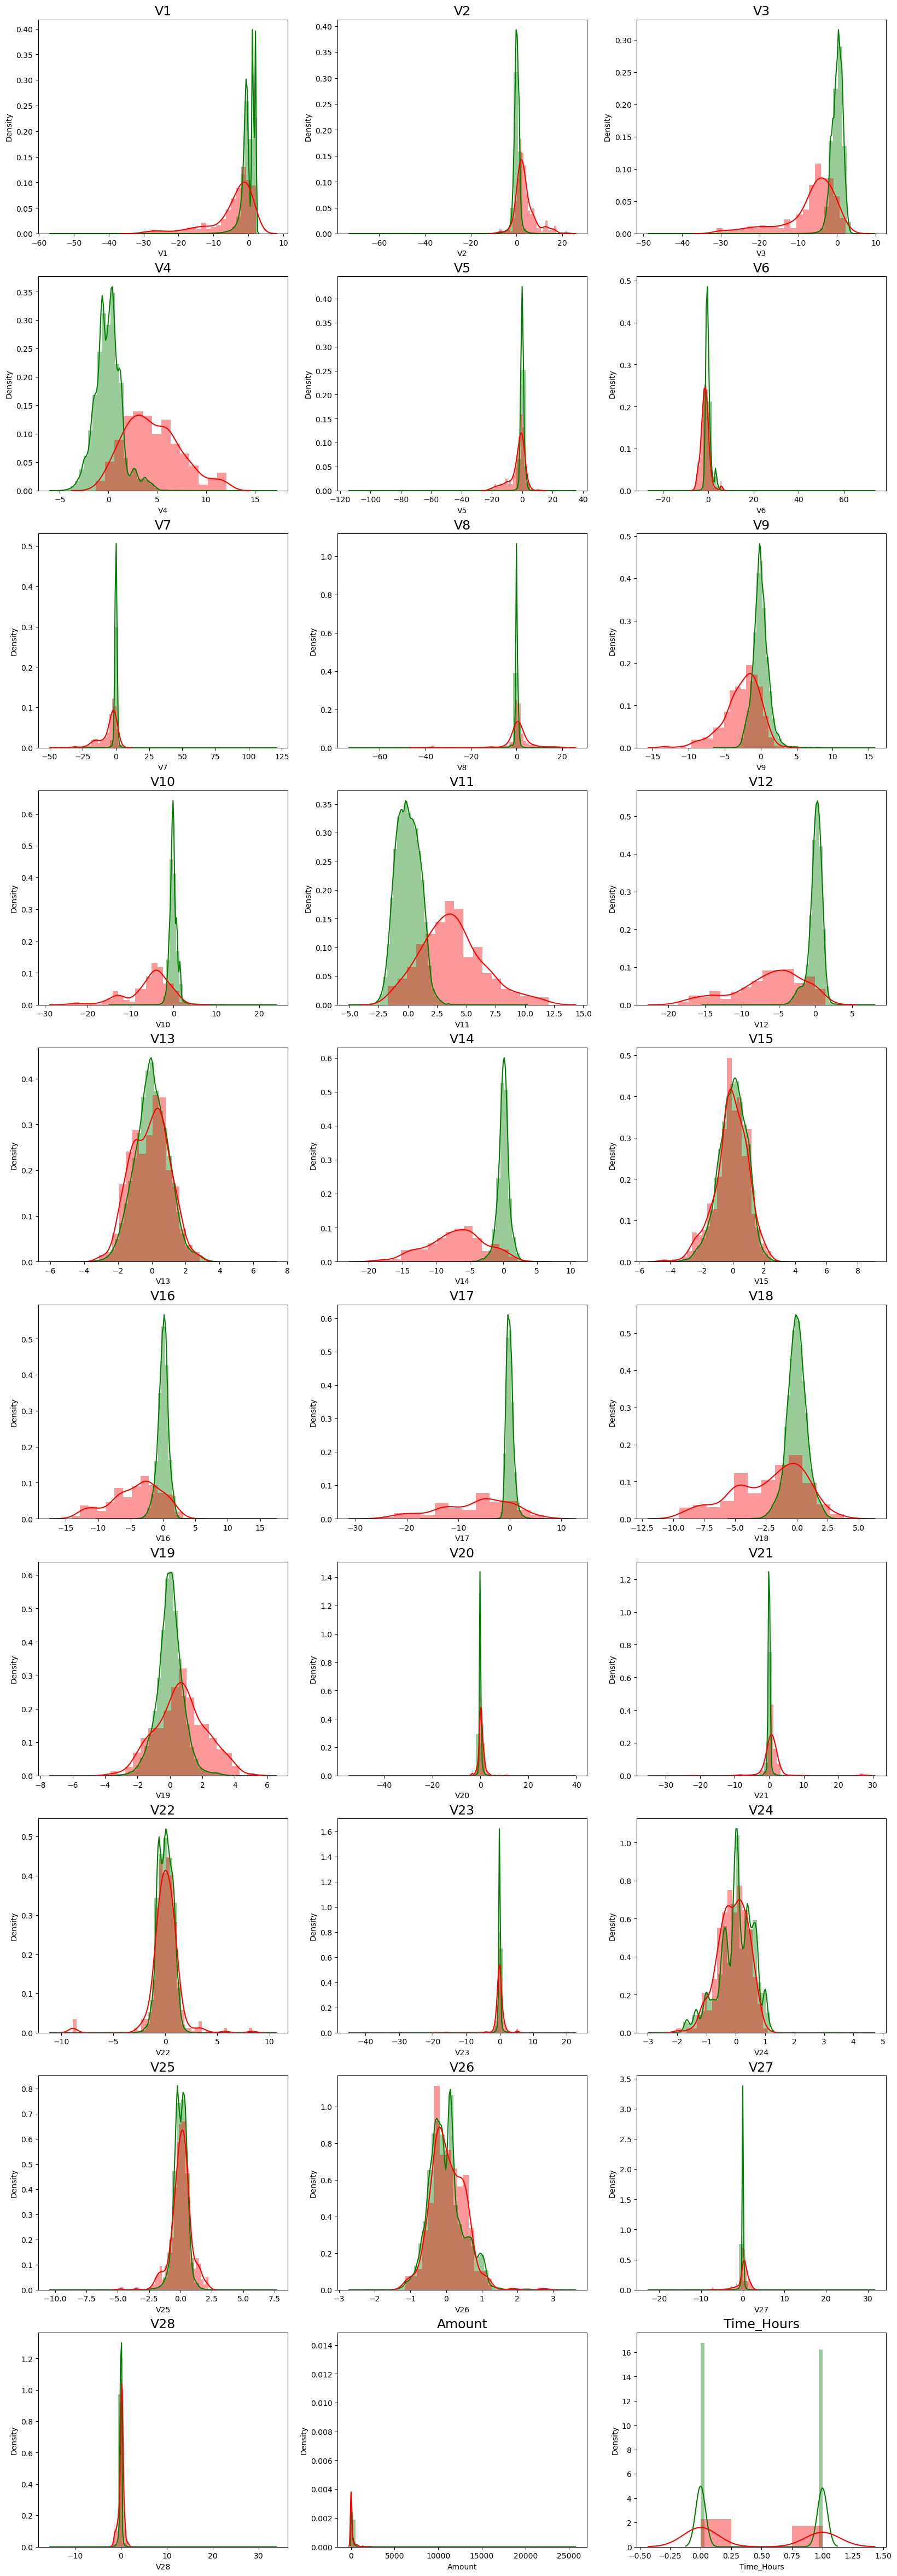

In [20]:
#plot of histogram 
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20,60))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(x[col][normal_records], color='green')
    sns.distplot(x[col][fraud_records], color='red')
    plt.title(col, fontsize=17)
    
plt.show()    

In [21]:
#created a dataframe to store results
df_Results = pd.DataFrame(columns=['Methodology','Model', 'Accuracy', 'roc_value', 'threshold'])

In [22]:
#Created a common function for Confusion matrix
def Plot_confusion_matrix(y_test, pred_test):
    cm = confusion_matrix(y_test, pred_test)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    categoryNames = ['Non-Fraudalent','Fraudalent']
    plt.title('Confusion_Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ticks = np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks, categoryNames)
    s = [['TN','FP'], ['FN','TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
            
    plt.show()

In [23]:
# created a common functi9on to fit and predict on a logistic regression model for both l1 and l2
def buildAndRunLogisticModels(df_Results, Methodology, x_train, y_train, x_test, y_test):
    #logistic regression
    from sklearn import linear_model
    from sklearn.model_selection import KFold 
    
    num_C = list(np.power(10.0, np.arange(-10, 10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)
    
    searchCV_l2 = linear_model.LogisticRegressionCV(
        Cs= num_C
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=cv_num
        ,random_state=42
        ,max_iter=10000
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=10
        )
    
    searchCV_l1 = linear_model.LogisticRegressionCV(
        Cs= num_C
        ,penalty='l1'
        ,scoring='roc_auc'
        ,cv=cv_num
        ,random_state=42
        ,max_iter=10000
        ,fit_intercept=True
        ,solver='liblinear'
        ,tol=10
        )
    searchCV_l1.fit(x_train, y_train)
    searchCV_l2.fit(x_train, y_train)
    print('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())
    print('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
    
    print("Parameters for l1 regularisations")
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_)
    print(searchCV_l1.scores_)
    
    print("Parameters for l2 regularisations")
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_)
    print(searchCV_l2.scores_)
    
    #find the predicted value
    y_pred_l1 = searchCV_l1.predict(x_test)
    y_pred_l2 = searchCV_l2.predict(x_test)
    
    #find the predicted probablities
    y_pred_probs_l1 = searchCV_l1.predict_proba(x_test)[:,1]
    y_pred_probs_l2 = searchCV_l2.predict_proba(x_test)[:,1]
    
    #accuaracy of l2/l1 models
    Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
    Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)
    
    print("Accuarcy of logistic model with l2 regulation : {0}".format(Accuracy_l2))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l2)
    print("classification Report")
    print(classification_report(y_test, y_pred_l2))
    
    print("Accuarcy of logistic model with l1 regulation : {0}".format(Accuracy_l1))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l1)
    print("classification Report")
    print(classification_report(y_test, y_pred_l1))
    
    l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
    print("l2 roc_value: {0}".format(l2_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l2 threshold: {0}".format(threshold))
    
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Methodology':Methodology,'Model': 'Logistic Regression with L2 Regulation','Accuracy':Accuracy_l2,'roc_value':l2_roc_value,'threshold':threshold},index=[0]),ignore_index=True)
    
    l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
    print("l1 roc_value: {0}".format(l1_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l1 threshold: {0}".format(threshold))
    
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Methodology':Methodology,'Model': 'Logistic Regression with L1 Regulation','Accuracy':Accuracy_l1,'roc_value':l1_roc_value,'threshold':threshold},index=[0]),ignore_index=True)
    return df_Results

In [24]:
#creating a common function for KNN model
def buildAndRunKNNModels(df_Results,Methodology, x_train,y_train, x_test, y_test):
    #create KNN model fit the model with train dataset
    knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
    knn.fit(x_train, y_train)
    score = knn.score(x_test, y_test)
    print("model score")
    print(score)
    
    #accuracy
    y_pred = knn.predict(x_test)
    KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
    print("Confusion matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    
    knn_probs = knn.predict_proba(x_test)[:,1]
    
    #calculate auc_roc
    knn_roc_value = roc_auc_score(y_test, knn_probs)
    print("KNN roc_value: {0}".format(knn_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("KNN threshold: {0}".format(threshold))
    
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Methodology':Methodology,'Model': 'KNN','Accuracy':score,'roc_value':knn_roc_value,'threshold':threshold},index=[0]),ignore_index=True)
    
    return df_Results

In [25]:
#creating a common function for TREE model for both gini and entropy criteria
def buildAndRunTreeModels(df_Results,Methodology, x_train,y_train, x_test, y_test):
    #evaluate tree model based on 'gini' and 'entropy'
    criteria = ['gini','entropy']
    scores = {}
    
    for c in criteria:
        dt = DecisionTreeClassifier(criterion = c, random_state=42)
        dt.fit(x_train, y_train)
        y_pred = dt.predict(x_test)
        test_score = dt.score(x_test, y_test)
        tree_preds = dt.predict_proba(x_test)[:, 1]
        tree_roc_value = roc_auc_score(y_test, tree_preds)
        scores = test_score
        print(c + "score: {0}".format(test_score))
        print("Confusion matrix")
        Plot_confusion_matrix(y_test, y_pred)
        print("Classification Report")
        print(classification_report(y_test, y_pred))
        print(c + "tree_roc_value: {0}".format(tree_roc_value))
        fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
        threshold = thresholds[np.argmax(tpr-fpr)]
        print("Tree threshold: {0}".format(threshold))
        roc_auc = metrics.auc(fpr, tpr)
        print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
        plt.plot(fpr, tpr, label="Test, auc="+str(roc_auc))
        plt.legend(loc=4)
        plt.show()
        df_Results = df_Results.append(pd.DataFrame({'Methodology':Methodology,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy':test_score,'roc_value':tree_roc_value,'threshold':threshold},index=[0]),ignore_index=True)

    return df_Results

In [26]:
#creating a common function for Random forest model 
def buildAndRunRandomForestModels(df_Results,Methodology, x_train,y_train, x_test, y_test):
    #evaluate random forest model 
    
    #create a mdel with 100 trees
    RF_model = RandomForestClassifier(n_estimators=100,
                                     bootstrap = True,
                                     max_features = 'sqrt', random_state=42)
    
    #fit on tranning dataset
    RF_model.fit(x_train, y_train)
    RF_test_score = RF_model.score(x_test, y_test)
    RF_model.predict(x_test)
    
    print('Model Accuracy: {0}'.format(RF_test_score))
    
    #Actual Class Prediction
    rf_predictions = RF_model.predict(x_test)
    
    print("Confusion matrix")
    Plot_confusion_matrix(y_test, rf_predictions)
    print("Classification Report")
    print(classification_report(y_test, rf_predictions))
    
    #probabilities for each class
    rf_probs = RF_model.predict_proba(x_test)[:, 1]
    
    #calculate roc auc
    roc_value = roc_auc_score(y_test, rf_probs)
    
    print("Random Forest roc_value: {0}".format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Random Forest threshold: {0}".format(threshold))
    
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Methodology':Methodology,'Model': 'Random Forest','Accuracy':RF_test_score,'roc_value':roc_value,'threshold':threshold},index=[0]),ignore_index=True)
    
    return df_Results

In [27]:
#creating a common function for XGBoost model 
def buildAndRunXGBoostModels(df_Results,Methodology, x_train,y_train, x_test, y_test):
    #evaluate XGBoost model 
    
    XGBmodel = XGBClassifier(random_state=42)
    
    #fit on tranning dataset
    XGBmodel.fit(x_train, y_train)
    y_pred = XGBmodel.predict(x_test)
    XGB_test_score = XGBmodel.score(x_test, y_test)
    
    print('Model Accuracy: {0}'.format(XGB_test_score))
    
    print("Confusion matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    
    #probabilities for each class
    XGB_probs = XGBmodel.predict_proba(x_test)[:, 1]
    
    #calculate roc auc
    XGB_roc_value = roc_auc_score(y_test, XGB_probs)
    
    print("XGBoost roc_value: {0}".format(XGB_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("XGBoost threshold: {0}".format(threshold))
    
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Methodology':Methodology,'Model': 'XGBoost','Accuracy':XGB_test_score,'roc_value':XGB_roc_value,'threshold':threshold},index=[0]),ignore_index=True)
    
    return df_Results

In [28]:
#creating a common function for SVM model 
def buildAndRunSVMModels(df_Results,Methodology, x_train,y_train, x_test, y_test):
    #evaluate SVM model with sigmoid kernel model
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import roc_auc_score
    
    clf = SVC(kernel = 'sigmoid', random_state=42)
    clf.fit(x_train, y_train)
    y_pred_SVM = clf.predict(x_test)
    SVM_Score = accuracy_score(y_test, y_pred_SVM)
    
    print('accuracy_score: {0}'.format(SVM_Score))
    
    print("Confusion matrix")
    Plot_confusion_matrix(y_test, y_pred_SVM)
    print("Classification Report")
    print(classification_report(y_test, y_pred_SVM))
    
    #run classifier
    classifier = SVC(kernel='sigmoid', probability=True)
    svm_probs = classifier.fit(x_train, y_train).predict_proba(x_test)[:, 1]
    
    #calculate roc auc
    roc_value = roc_auc_score(y_test, svm_probs)
    
    print("SVM roc_value: {0}".format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("SVM threshold: {0}".format(threshold))
    
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Methodology':Methodology,'Model': 'SVM','Accuracy':SVM_Score,'roc_value':roc_value,'threshold':threshold},index=[0]),ignore_index=True)
    
    return df_Results
    
    

In [29]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
for train_index, test_index in rkf.split(x,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train_cv, x_test_cv = x.iloc[train_index], x.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     0      1      2 ... 284802 284805 284806] TEST: [     5      6      8 ... 284790 284803 284804]
TRAIN: [     0      1      2 ... 284803 284804 284806] TEST: [     7     13     15 ... 284795 284796 284805]
TRAIN: [     0      1      2 ... 284803 284804 284805] TEST: [     9     12     21 ... 284794 284802 284806]
TRAIN: [     1      2      3 ... 284804 284805 284806] TEST: [     0     11     24 ... 284797 284798 284801]
TRAIN: [     0      5      6 ... 284804 284805 284806] TEST: [     1      2      3 ... 284793 284799 284800]
TRAIN: [     0      1      2 ... 284799 284802 284806] TEST: [     6     17     31 ... 284803 284804 284805]
TRAIN: [     1      2      3 ... 284803 284804 284805] TEST: [     0      4     13 ... 284799 284802 284806]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     9     22     32 ... 284790 284791 284794]
TRAIN: [     0      2      3 ... 284804 284805 284806] TEST: [     1      5      8 ... 284782 284783 284788]
TRAIN: [     0     

logistic regresssion with li and l2 regulation
Max auc_roc for l1: 0.9708538025366205
Max auc_roc for l2: 0.9815878654636062
Parameters for l1 regularisations
[[-1.92362193e-03 -1.21496207e-01 -4.41744501e-01  3.12293564e-02
  -1.79289206e-01  4.97244441e-02  1.80954991e-01 -6.95214035e-02
  -5.70593702e-02 -1.51847121e-01 -1.22955571e-01 -1.47012389e-01
   1.72303529e-03 -1.64680779e-01 -1.67323103e-01 -1.15318202e-01
  -2.45964400e-01  1.51518051e-01  8.74289658e-04  1.71693558e-01
   1.78254938e-01  8.85112759e-02  1.47339781e-01 -1.94312957e-02
  -2.72633907e-01 -1.69988301e-02 -3.47934718e-02  7.83494498e-03
  -6.52942579e-03 -1.95359905e+00]]
[-2.82420801]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.54188668,
        0.54188668, 0.54188668, 0.7917403 , 0.91639071, 0.94441096,
        0.92712417, 0.93186195, 0.96083341, 0.95531708, 0.95502003,
        0.95403666, 0.918647  , 0.96683875, 0.96973954, 0.97374596],
       [0.5       , 0.5       , 0.5       , 0.5     

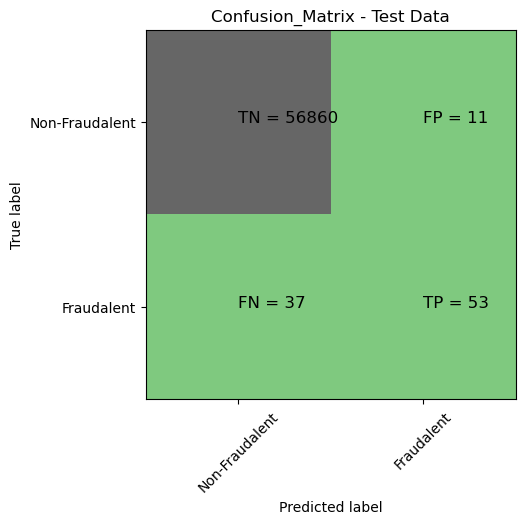

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.83      0.59      0.69        90

    accuracy                           1.00     56961
   macro avg       0.91      0.79      0.84     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of logistic model with l1 regulation : 0.9991397622934991
Confusion Matrix


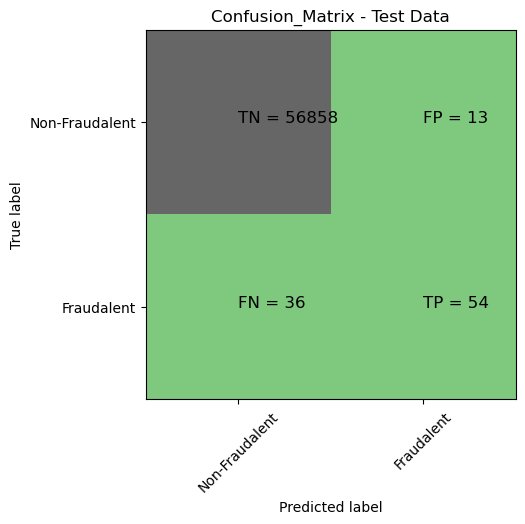

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.81      0.60      0.69        90

    accuracy                           1.00     56961
   macro avg       0.90      0.80      0.84     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9903203937175558
l2 threshold: 0.0024257446286486003
ROC for the test dataset 99.0%


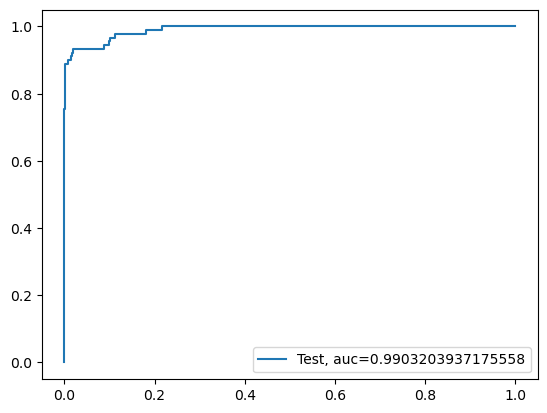

l1 roc_value: 0.8943630712001236
l1 threshold: 0.12001251155691228
ROC for the test dataset 89.4%


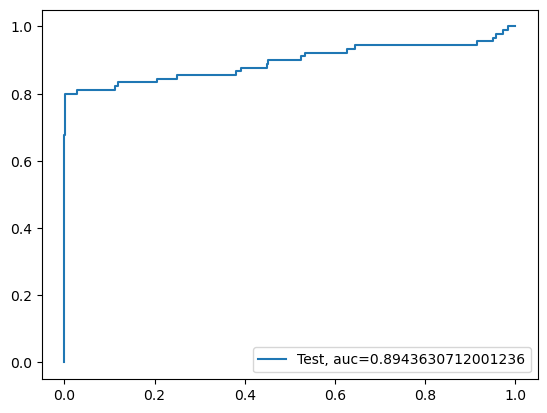

Time Taken by model:--- 251.8336226940155 seconds ---
------------------------------------------------------------
KNN model
model score
0.999280209265989
Confusion matrix


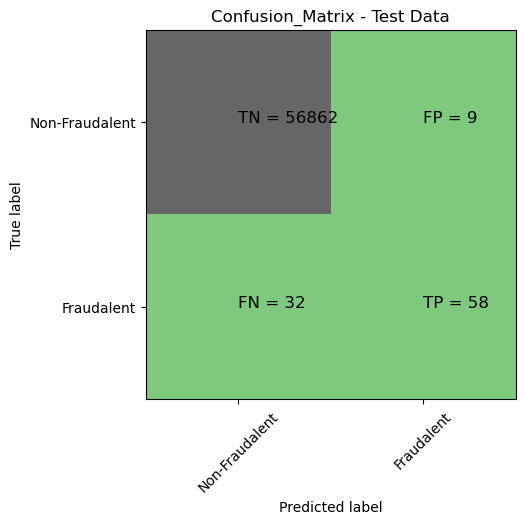

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.87      0.64      0.74        90

    accuracy                           1.00     56961
   macro avg       0.93      0.82      0.87     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8775492879596904
KNN threshold: 0.2
ROC for the test dataset 87.8%


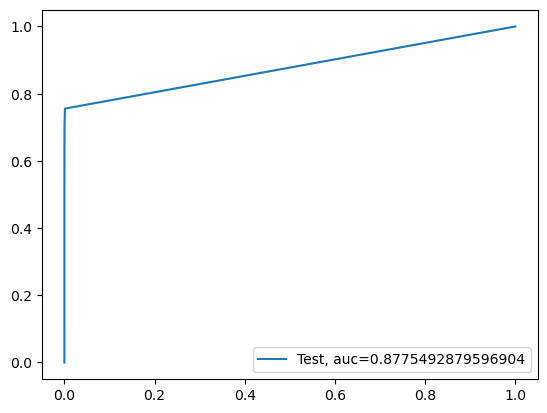

Time Taken by model:--- 1145.9283983707428 seconds ---
------------------------------------------------------------
Decision tree model with 'gini' & 'entropy' criteria
giniscore: 0.9990695388072541
Confusion matrix


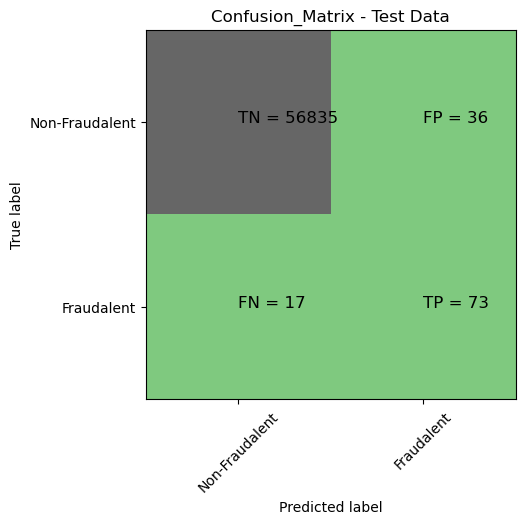

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.67      0.81      0.73        90

    accuracy                           1.00     56961
   macro avg       0.83      0.91      0.87     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.9052390497793251
Tree threshold: 1.0
ROC for the test dataset 90.5%


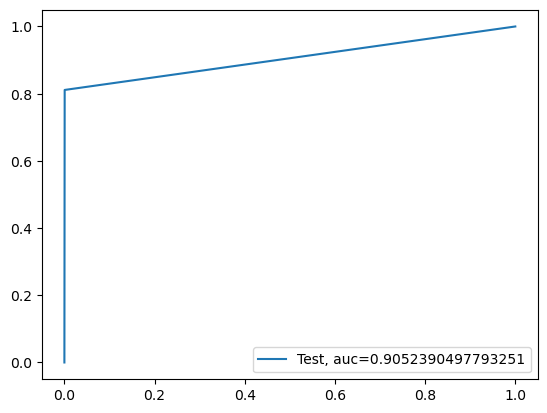

entropyscore: 0.9992450975228665
Confusion matrix


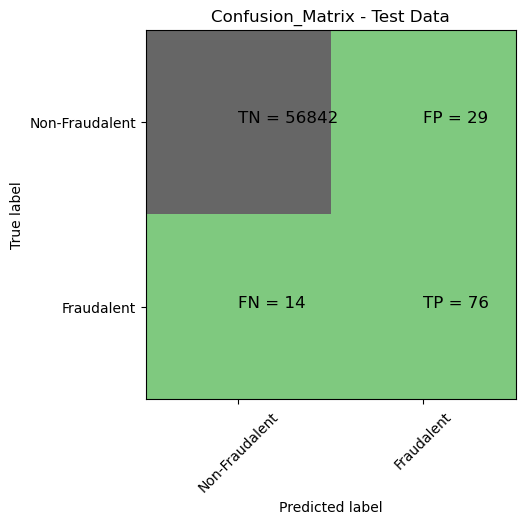

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.72      0.84      0.78        90

    accuracy                           1.00     56961
   macro avg       0.86      0.92      0.89     56961
weighted avg       1.00      1.00      1.00     56961

entropytree_roc_value: 0.9219672592358145
Tree threshold: 1.0
ROC for the test dataset 92.2%


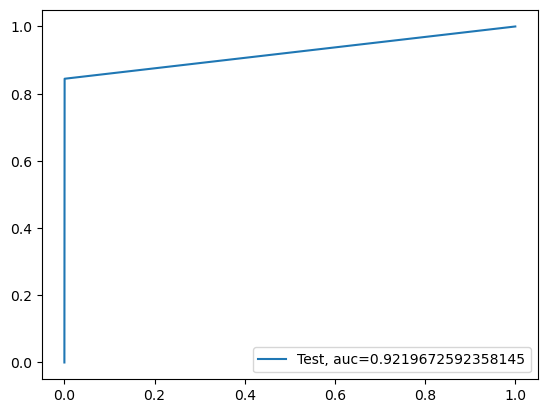

Time Taken by model:--- 24.81658625602722 seconds ---
------------------------------------------------------------
random forest model
Model Accuracy: 0.9995962149540913
Confusion matrix


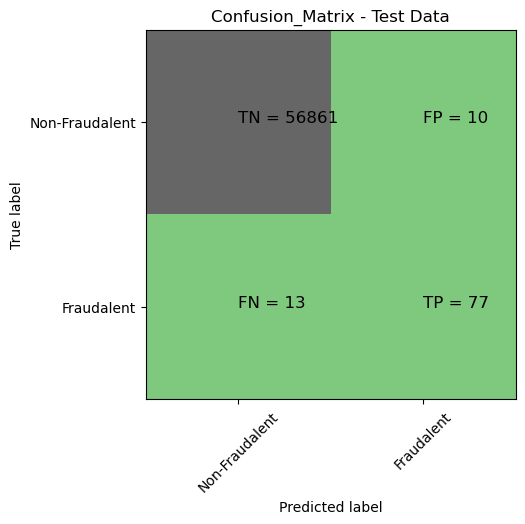

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.89      0.86      0.87        90

    accuracy                           1.00     56961
   macro avg       0.94      0.93      0.93     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9427968560426228
Random Forest threshold: 0.37
ROC for the test dataset 94.3%


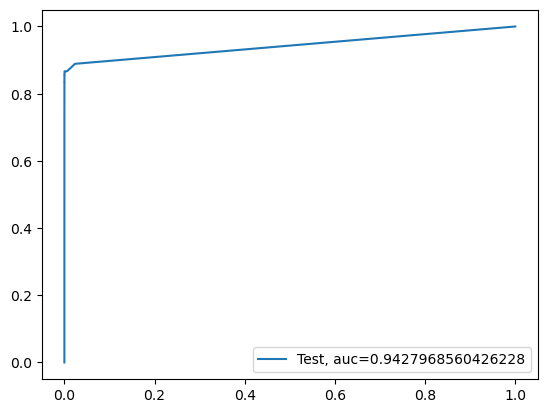

Time Taken by model:--- 170.32025861740112 seconds ---
------------------------------------------------------------
XGBoost model
Model Accuracy: 0.9996664384403364
Confusion matrix


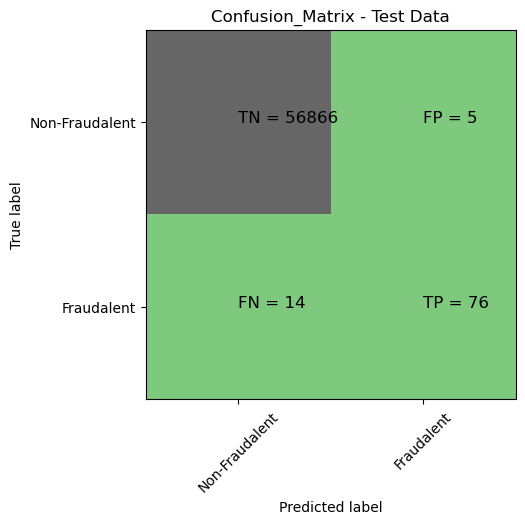

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.94      0.84      0.89        90

    accuracy                           1.00     56961
   macro avg       0.97      0.92      0.94     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.981567446013297
XGBoost threshold: 0.00012120764586143196
ROC for the test dataset 98.2%


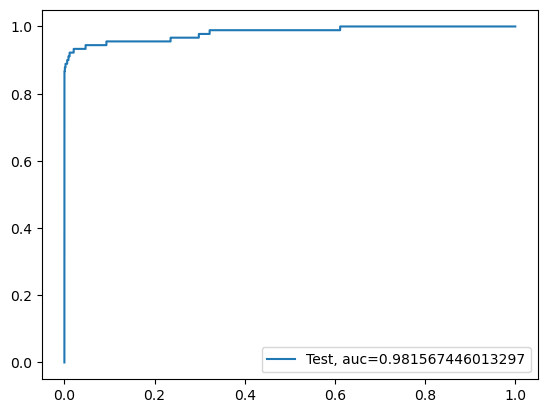

Time Taken by model:--- 29.961122751235962 seconds ---
------------------------------------------------------------
SVM Model
accuracy_score: 0.9984375274310493
Confusion matrix


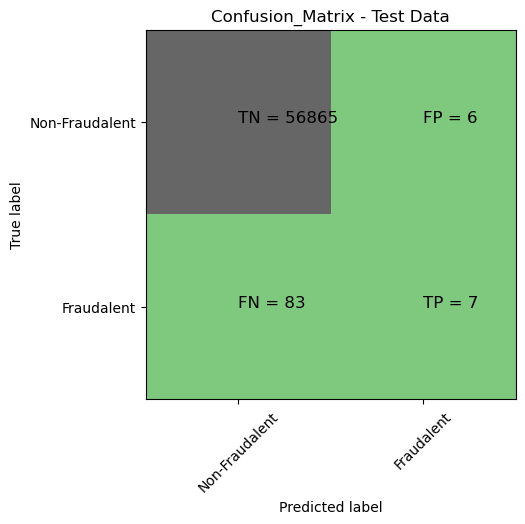

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.54      0.08      0.14        90

    accuracy                           1.00     56961
   macro avg       0.77      0.54      0.57     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.48227899788800777
SVM threshold: 0.002327172659927145
ROC for the test dataset 48.2%


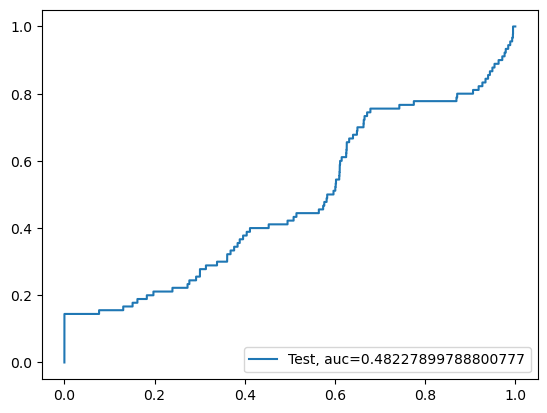

Time Taken by model:--- 320.8174011707306 seconds ---
------------------------------------------------------------


In [30]:
print("logistic regresssion with li and l2 regulation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Repeated Cross Validation", x_train_cv, y_train_cv, x_test_cv, y_test_cv)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("KNN model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Repeated Cross Validation", x_train_cv, y_train_cv, x_test_cv, y_test_cv)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("Decision tree model with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Repeated Cross Validation", x_train_cv, y_train_cv, x_test_cv, y_test_cv)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("random forest model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Repeated Cross Validation", x_train_cv, y_train_cv, x_test_cv, y_test_cv)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("XGBoost model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"Repeated Cross Validation", x_train_cv, y_train_cv, x_test_cv, y_test_cv)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("SVM Model")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"Repeated Cross Validation", x_train_cv, y_train_cv, x_test_cv, y_test_cv)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)



In [31]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,Repeated Cross Validation,Logistic Regression with L2 Regulation,0.999157,0.990320,0.002426
1,Repeated Cross Validation,Logistic Regression with L1 Regulation,0.999140,0.894363,0.120013
2,Repeated Cross Validation,KNN,0.999280,0.877549,0.200000
3,Repeated Cross Validation,Tree Model with gini criteria,0.999070,0.905239,1.000000
4,Repeated Cross Validation,Tree Model with entropy criteria,0.999245,0.921967,1.000000
5,Repeated Cross Validation,Random Forest,0.999596,0.942797,0.370000
6,Repeated Cross Validation,XGBoost,0.999666,0.981567,0.000121
7,Repeated Cross Validation,SVM,0.998438,0.482279,0.002327


In [32]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
for train_index, test_index in skf.split(x,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train_SKF_cv, x_test_SKF_cv = x.iloc[train_index], x.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


logistic regresssion with li and l2 regulation
Max auc_roc for l1: 0.97230555842236
Max auc_roc for l2: 0.9828248599359395
Parameters for l1 regularisations
[[ 5.44882636e-02 -1.30132291e-01 -5.49719658e-01 -6.66251991e-03
  -1.17514361e-01  3.31721933e-03  2.14502624e-01 -9.63321919e-02
  -2.27511046e-02 -1.29138912e-01 -2.14150169e-01 -1.06204047e-01
  -8.35198211e-03 -1.65254829e-01 -2.83224694e-01 -9.71133440e-02
  -2.69222727e-01  1.80618957e-01 -6.68798754e-04  1.18192025e-01
   2.05129761e-01  1.83437612e-01  1.50988681e-01  4.40593045e-03
  -4.70073314e-01 -2.75735313e-02 -7.28648045e-03  2.02273275e-02
  -6.46657220e-03 -2.30117552e+00]]
[-2.88513761]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.48341269,
        0.48341269, 0.48341269, 0.85307983, 0.95800445, 0.92747217,
        0.91349733, 0.91569326, 0.95044043, 0.9462199 , 0.96750852,
        0.96068511, 0.91489628, 0.95536324, 0.95500702, 0.9895772 ],
       [0.5       , 0.5       , 0.5       , 0.5       

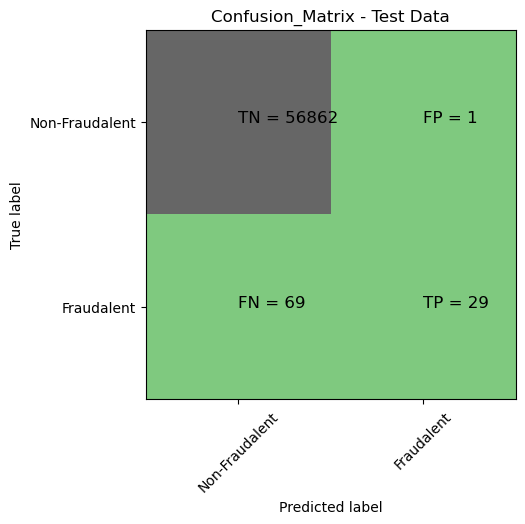

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of logistic model with l1 regulation : 0.9987359772475904
Confusion Matrix


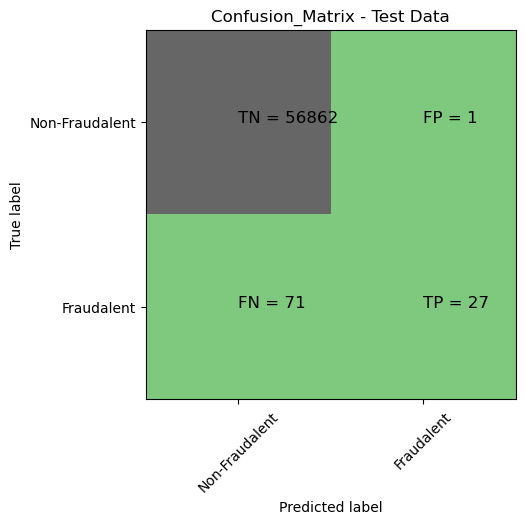

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.28      0.43        98

    accuracy                           1.00     56961
   macro avg       0.98      0.64      0.71     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.983335528608503
l2 threshold: 0.0015840936574919033
ROC for the test dataset 98.3%


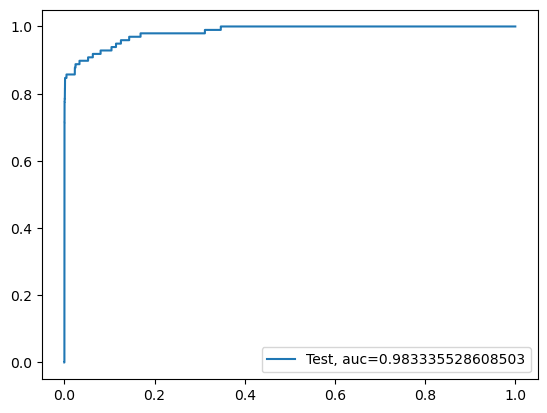

l1 roc_value: 0.8789213027947229
l1 threshold: 0.02258180395485589
ROC for the test dataset 87.9%


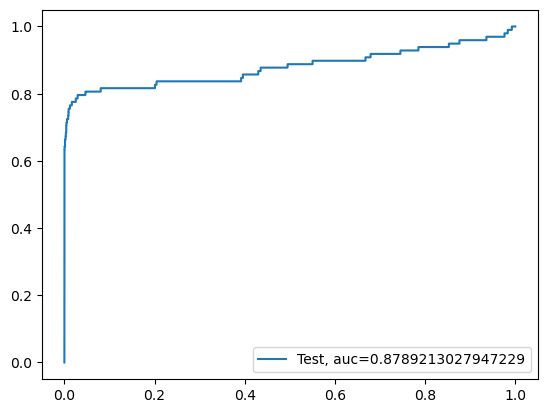

Time Taken by model:--- 214.27896118164062 seconds ---
------------------------------------------------------------
KNN model
model score
0.9991397622934991
Confusion matrix


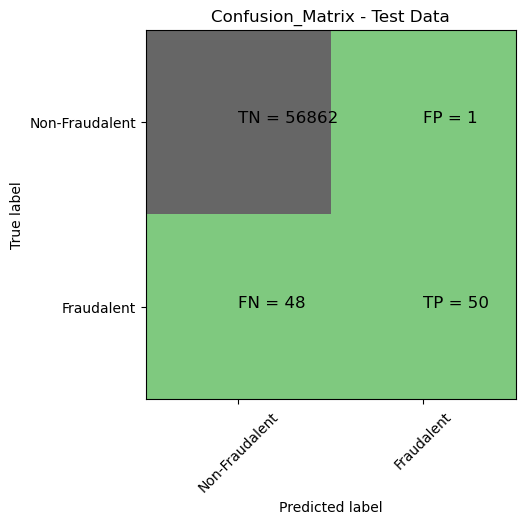

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.51      0.67        98

    accuracy                           1.00     56961
   macro avg       0.99      0.76      0.84     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8110179425163309
KNN threshold: 0.2
ROC for the test dataset 81.1%


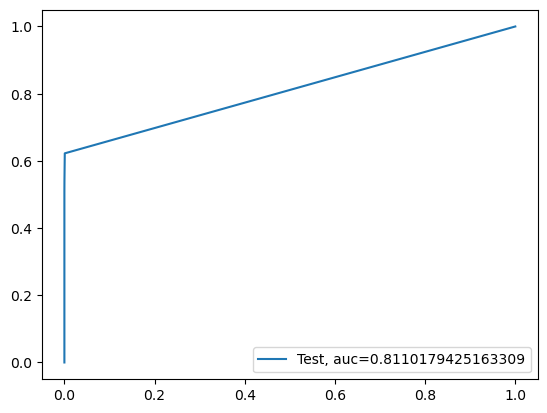

Time Taken by model:--- 2433.0397963523865 seconds ---
------------------------------------------------------------
Decision tree model with 'gini' & 'entropy' criteria
giniscore: 0.9988939800916417
Confusion matrix


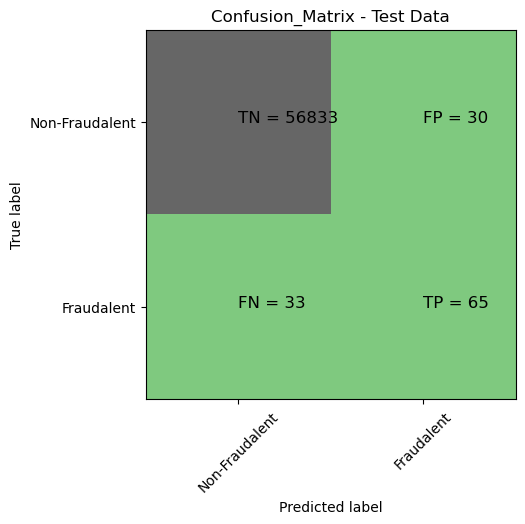

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.68      0.66      0.67        98

    accuracy                           1.00     56961
   macro avg       0.84      0.83      0.84     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.8313688611402917
Tree threshold: 1.0
ROC for the test dataset 83.1%


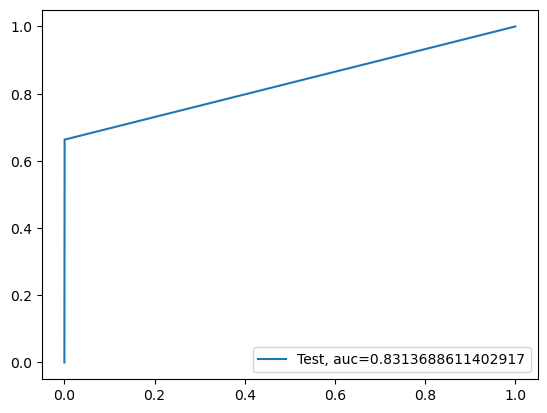

entropyscore: 0.9990695388072541
Confusion matrix


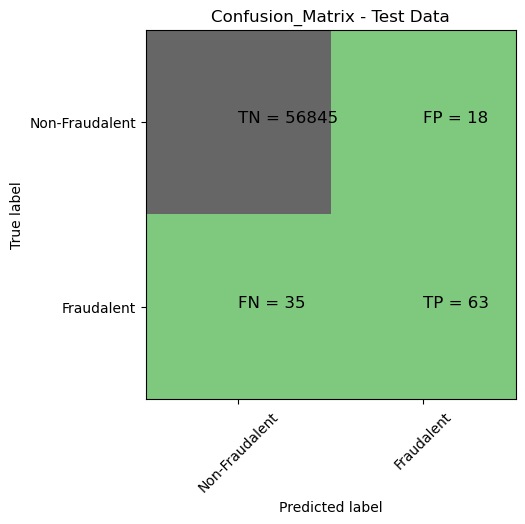

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.78      0.64      0.70        98

    accuracy                           1.00     56961
   macro avg       0.89      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropytree_roc_value: 0.8212702962760117
Tree threshold: 1.0
ROC for the test dataset 82.1%


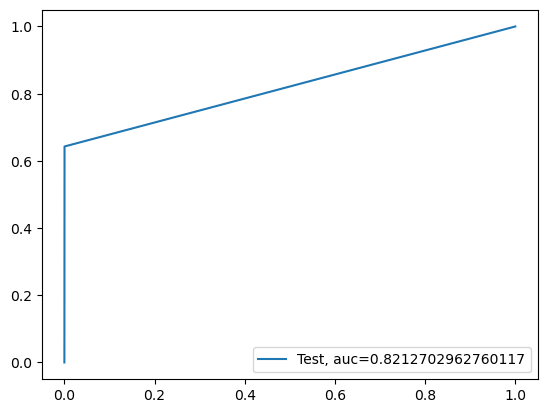

Time Taken by model:--- 52.55584955215454 seconds ---
------------------------------------------------------------
random forest model
Model Accuracy: 0.9994382121100402
Confusion matrix


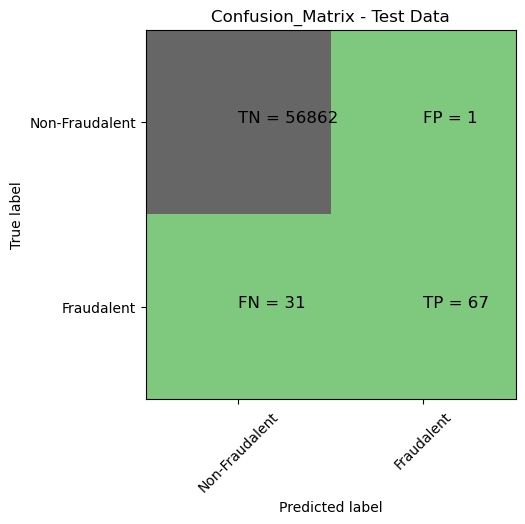

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9265444478619755
Random Forest threshold: 0.01
ROC for the test dataset 92.7%


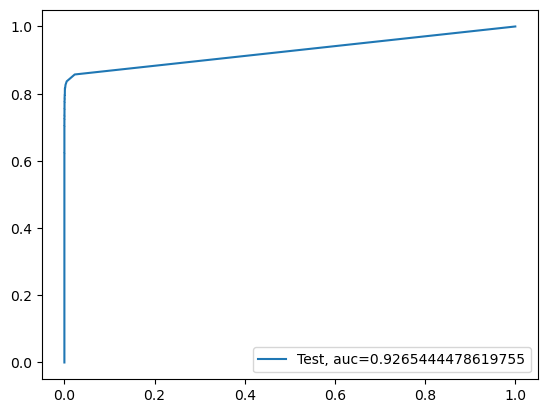

Time Taken by model:--- 321.5887231826782 seconds ---
------------------------------------------------------------
XGBoost model
Model Accuracy: 0.9994382121100402
Confusion matrix


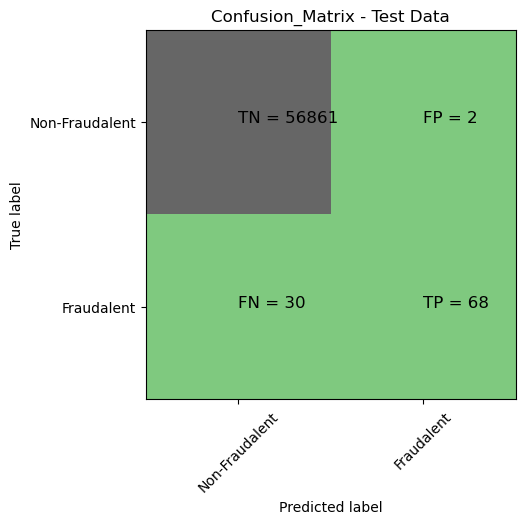

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.69      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9834001307115886
XGBoost threshold: 3.5948130971519276e-05
ROC for the test dataset 98.3%


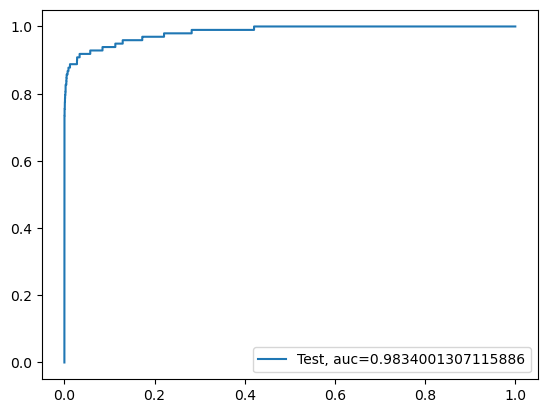

Time Taken by model:--- 138.16693258285522 seconds ---
------------------------------------------------------------
SVM Model
accuracy_score: 0.9982795245869981
Confusion matrix


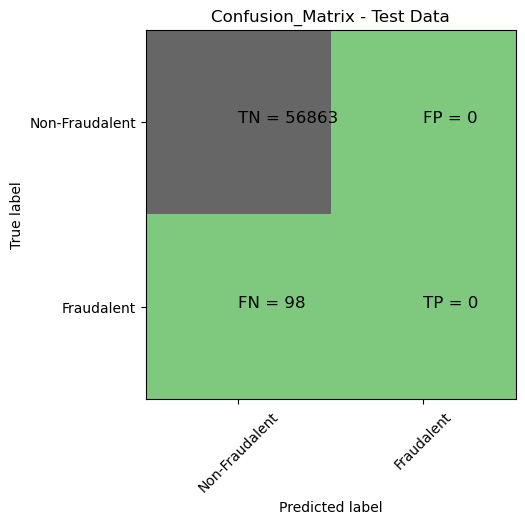

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.40211884131103504
SVM threshold: 0.004339937304819213
ROC for the test dataset 40.2%


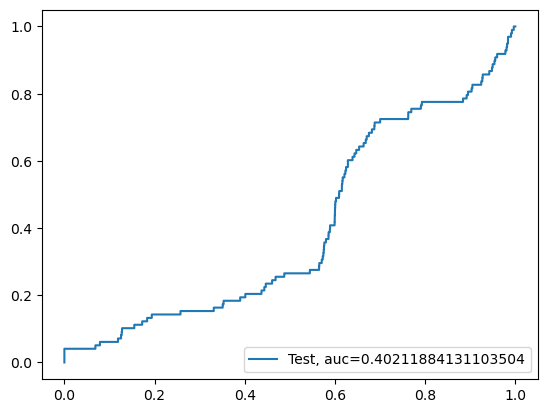

Time Taken by model:--- 189.36616110801697 seconds ---
------------------------------------------------------------


In [33]:
print("logistic regresssion with li and l2 regulation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Stratified Cross Validation", x_train_SKF_cv, y_train_SKF_cv, x_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("KNN model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Stratified Cross Validation", x_train_SKF_cv, y_train_SKF_cv, x_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("Decision tree model with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Stratified Cross Validation", x_train_SKF_cv, y_train_SKF_cv, x_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("random forest model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Stratified Cross Validation", x_train_SKF_cv, y_train_SKF_cv, x_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("XGBoost model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"Stratified Cross Validation", x_train_SKF_cv, y_train_SKF_cv, x_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("SVM Model")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"Stratified Cross Validation", x_train_SKF_cv, y_train_SKF_cv, x_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

In [34]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,Repeated Cross Validation,Logistic Regression with L2 Regulation,0.999157,0.990320,0.002426
1,Repeated Cross Validation,Logistic Regression with L1 Regulation,0.999140,0.894363,0.120013
2,Repeated Cross Validation,KNN,0.999280,0.877549,0.200000
3,Repeated Cross Validation,Tree Model with gini criteria,0.999070,0.905239,1.000000
4,Repeated Cross Validation,Tree Model with entropy criteria,0.999245,0.921967,1.000000
5,Repeated Cross Validation,Random Forest,0.999596,0.942797,0.370000
6,Repeated Cross Validation,XGBoost,0.999666,0.981567,0.000121
7,Repeated Cross Validation,SVM,0.998438,0.482279,0.002327
8,Stratified Cross Validation,Logistic Regression with L2 Regulation,0.998771,0.983336,0.001584
9,Stratified Cross Validation,Logistic Regression with L1 Regulation,0.998736,0.878921,0.022582


In [35]:
#hyper parametrisation of l2 logestic model with stratific cross validation method

# created a common functi9on to fit and predict on a logistic regression model for both l1 and l2

#logistic regression
from sklearn import linear_model
from sklearn.model_selection import KFold 

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

clf = linear_model.LogisticRegressionCV(
    Cs= num_C
    ,penalty='l2'
    ,scoring='roc_auc'
    ,cv=cv_num
    ,random_state=42
    ,max_iter=10000
    ,fit_intercept=True
    ,solver='newton-cg'
    ,tol=10
    )
clf.fit(x_train_SKF_cv, y_train_SKF_cv)
print('Max auc_roc for l2:', clf.scores_[1].mean(axis=0).max())

print("Parameters for l2 regularisations")
print(clf.coef_)
print(clf.intercept_)
print(clf.scores_)

#find the predicted value
y_pred_l2 = clf.predict(x_test)

#find the predicted probablities
y_pred_probs_l2 = clf.predict_proba(x_test)[:,1]

#accuaracy of l2/l1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)

print("Accuarcy of logistic model with l2 regulation : {0}".format(Accuracy_l2))

from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}".format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))


Max auc_roc for l2: 0.9828248599359395
Parameters for l2 regularisations
[[ 0.0069235   0.06097189 -0.06731455  0.21811762  0.05384859 -0.03184752
  -0.0225162  -0.11480569 -0.06971808 -0.16359862  0.12722499 -0.19103634
  -0.0372676  -0.36040796  0.00345411 -0.08779937 -0.07270391 -0.00059645
   0.0039475  -0.02788689  0.03831284  0.02352083 -0.01181734 -0.00996287
  -0.00675935  0.00629239 -0.01025053 -0.00170474  0.00039346 -0.01025887]]
[-7.39968842]
{1: array([[0.69460846, 0.69641661, 0.71643591, 0.84191303, 0.966388  ,
        0.99059063, 0.99622024, 0.99484158, 0.99096263, 0.99008561,
        0.99008561, 0.99008561, 0.99008561, 0.99008561, 0.99008561,
        0.99008561, 0.99008561, 0.99008561, 0.99008561, 0.99008561],
       [0.60452743, 0.60614437, 0.62634862, 0.76613336, 0.91383718,
        0.95983104, 0.9750357 , 0.98213507, 0.98565809, 0.982005  ,
        0.97915384, 0.97915384, 0.97915384, 0.97915384, 0.97915384,
        0.97915384, 0.97915384, 0.97915384, 0.97915384, 0.97

In [36]:
#checking for the coefficient values
clf.coef_

array([[ 0.0069235 ,  0.06097189, -0.06731455,  0.21811762,  0.05384859,
        -0.03184752, -0.0225162 , -0.11480569, -0.06971808, -0.16359862,
         0.12722499, -0.19103634, -0.0372676 , -0.36040796,  0.00345411,
        -0.08779937, -0.07270391, -0.00059645,  0.0039475 , -0.02788689,
         0.03831284,  0.02352083, -0.01181734, -0.00996287, -0.00675935,
         0.00629239, -0.01025053, -0.00170474,  0.00039346, -0.01025887]])

In [37]:
#creating a dataframe with coefficient values
coefficients = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(clf.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

In [38]:
coefficients

,Feature,Importance Coefficient
0,V1,0.006924
1,V2,0.060972
2,V3,-0.067315
3,V4,0.218118
4,V5,0.053849
5,V6,-0.031848
6,V7,-0.022516
7,V8,-0.114806
8,V9,-0.069718
9,V10,-0.163599


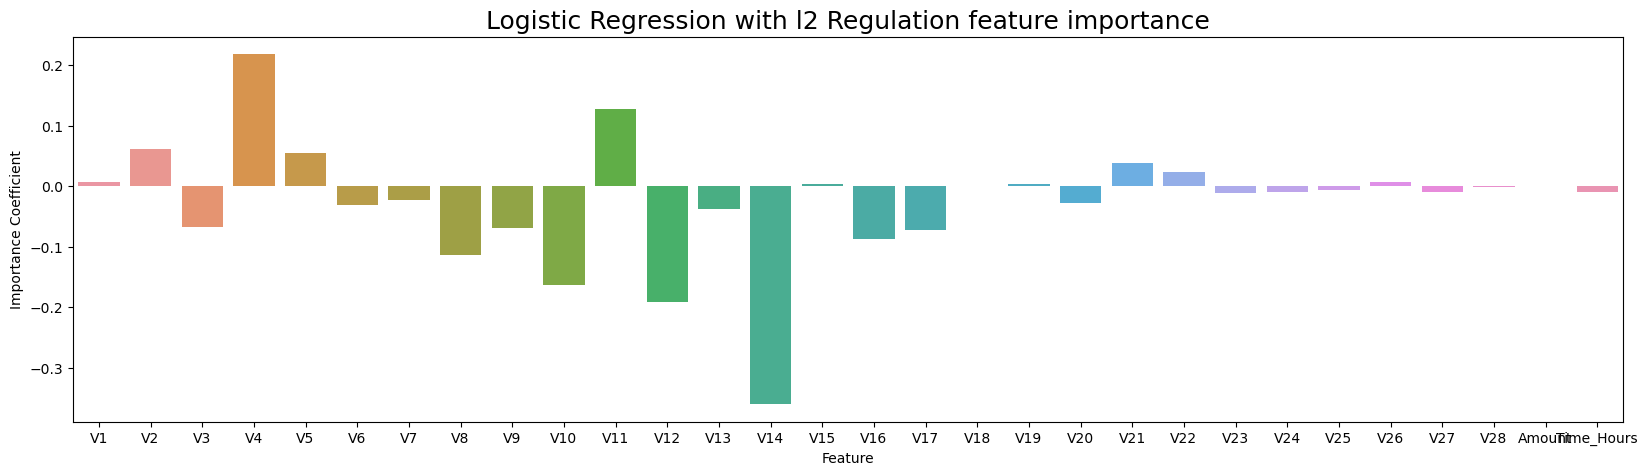

In [39]:
#printing the important features
#plotting the coeff values
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with l2 Regulation feature importance", fontsize=18)

plt.show()

In [42]:
#OVER SAMPLING WITH RANDOMOVERSAMPLING
from sklearn.model_selection import StratifiedKFold
from imblearn import under_sampling, over_sampling

from imblearn.over_sampling import RandomOverSampler
skf = StratifiedKFold(n_splits=5, random_state=None)
for fold, (train_index, test_index) in enumerate(skf.split(x,y), 1):
    x_train = x.loc[train_index]
    y_train = y.loc[train_index]
    x_test = x.loc[test_index]
    y_test = y.loc[test_index]
    ROS= RandomOverSampler (sampling_strategy=0.5)
    x_over, y_over = ROS.fit_resample(x_train, y_train)
x_over = pd.DataFrame(data=x_over, columns=cols)

logistic regresssion with li and l2 regulation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.9877571730513859
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0

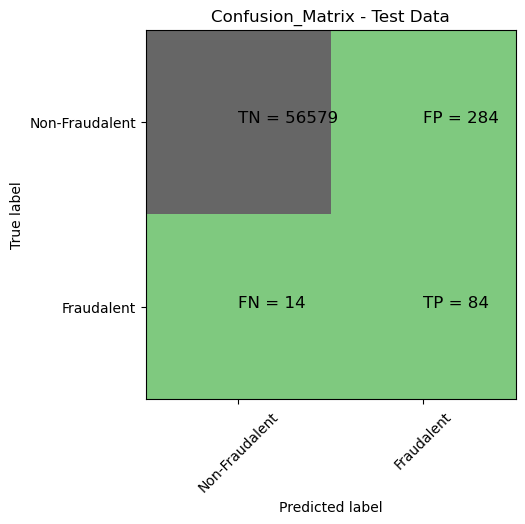

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.23      0.86      0.36        98

    accuracy                           0.99     56961
   macro avg       0.61      0.93      0.68     56961
weighted avg       1.00      0.99      1.00     56961

Accuarcy of logistic model with l1 regulation : 0.9982795245869981
Confusion Matrix


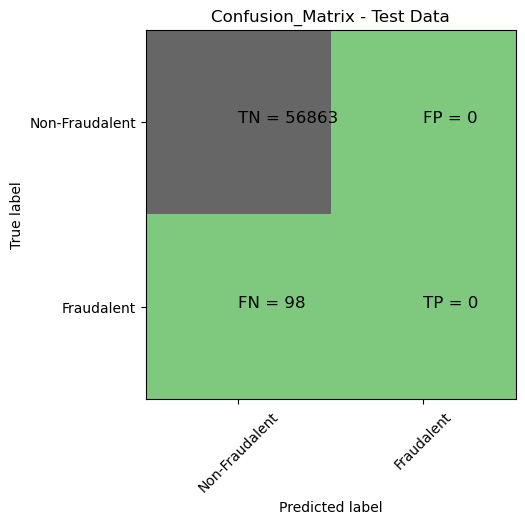

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9829488132414212
l2 threshold: 0.2936449785030668
ROC for the test dataset 98.3%


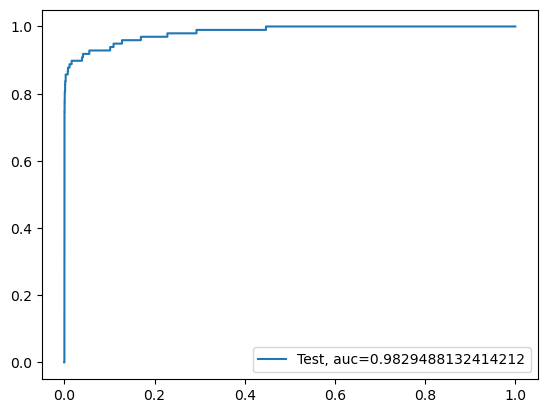

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


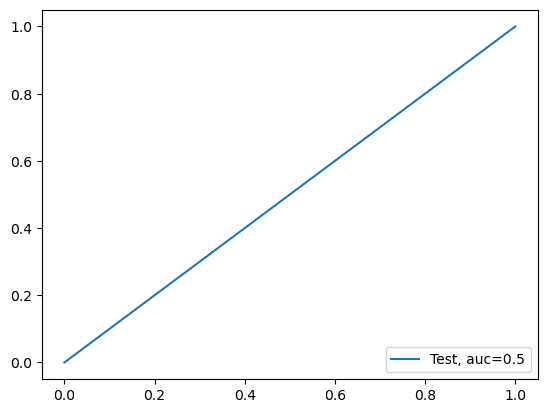

Time Taken by model:--- 356.9889380931854 seconds ---
------------------------------------------------------------
KNN model
model score
0.998771088990713
Confusion matrix


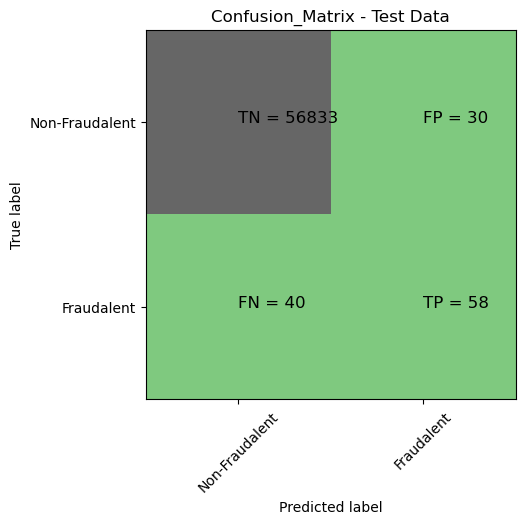

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.66      0.59      0.62        98

    accuracy                           1.00     56961
   macro avg       0.83      0.80      0.81     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8109971262831145
KNN threshold: 0.2
ROC for the test dataset 81.1%


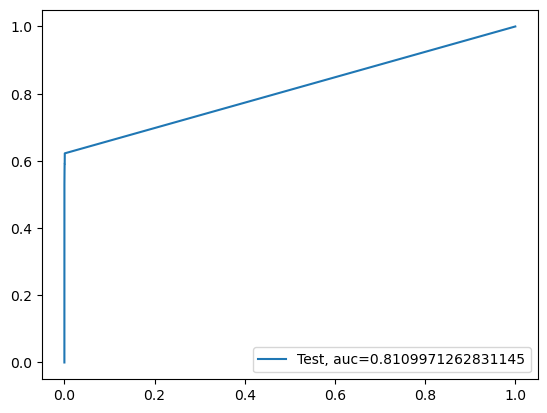

Time Taken by model:--- 1706.2231612205505 seconds ---
------------------------------------------------------------
Decision tree model with 'gini' & 'entropy' criteria
giniscore: 0.9989642035778866
Confusion matrix


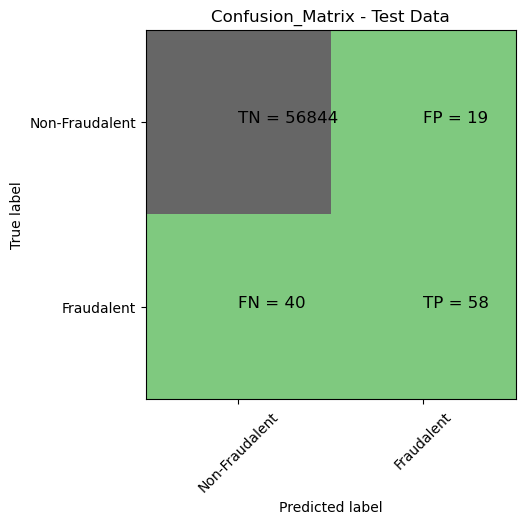

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.59      0.66        98

    accuracy                           1.00     56961
   macro avg       0.88      0.80      0.83     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.795751299130348
Tree threshold: 1.0
ROC for the test dataset 79.6%


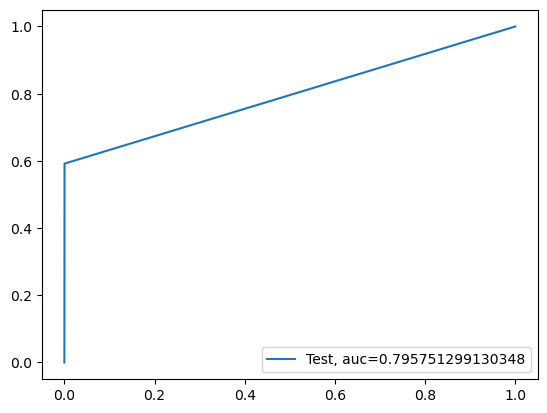

entropyscore: 0.9990344270641316
Confusion matrix


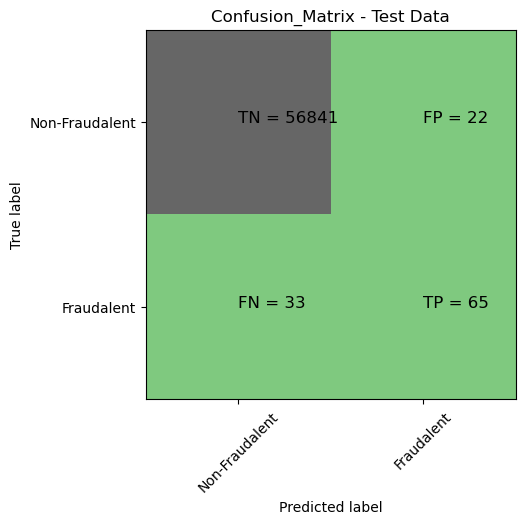

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.66      0.70        98

    accuracy                           1.00     56961
   macro avg       0.87      0.83      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropytree_roc_value: 0.8314392056525405
Tree threshold: 1.0
ROC for the test dataset 83.1%


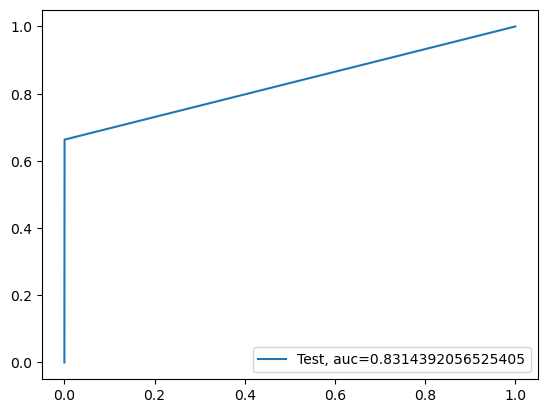

Time Taken by model:--- 18.703762531280518 seconds ---
------------------------------------------------------------
random forest model
Model Accuracy: 0.9995084355962852
Confusion matrix


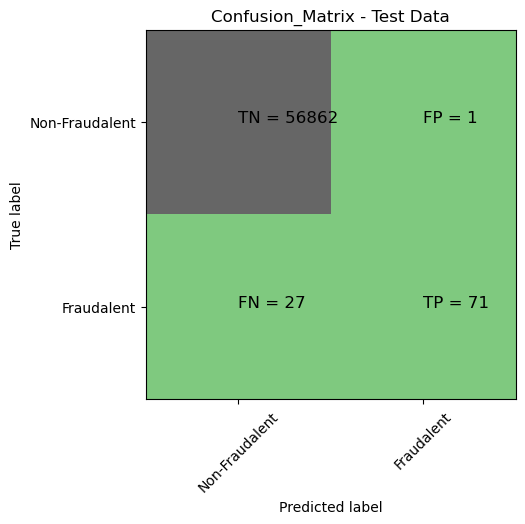

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.72      0.84        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9368064919371192
Random Forest threshold: 0.01
ROC for the test dataset 93.7%


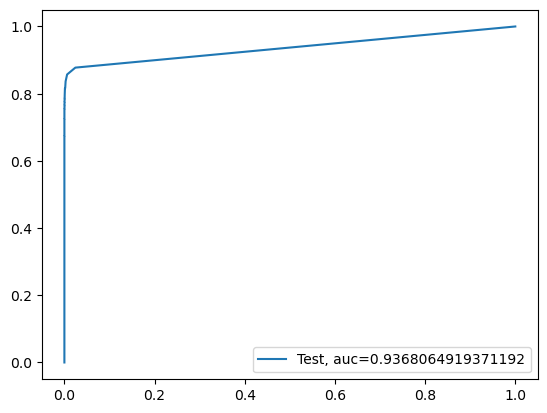

Time Taken by model:--- 134.35657811164856 seconds ---
------------------------------------------------------------
XGBoost model
Model Accuracy: 0.9995084355962852
Confusion matrix


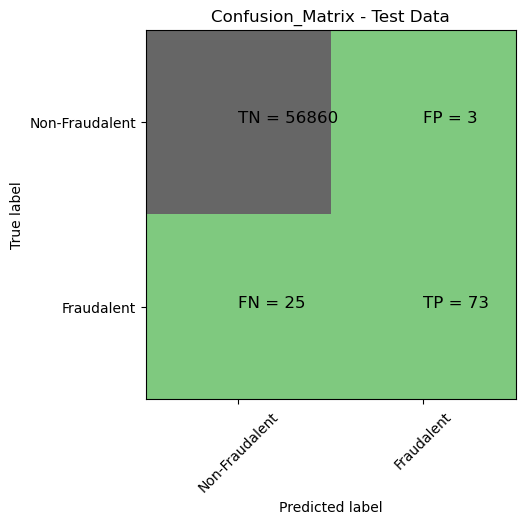

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56961
   macro avg       0.98      0.87      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9827594931893233
XGBoost threshold: 3.872992601827718e-05
ROC for the test dataset 98.3%


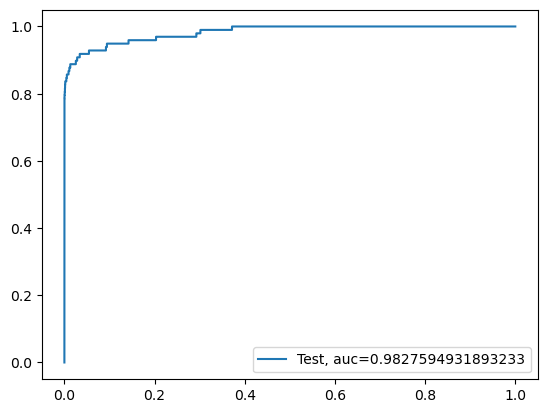

Time Taken by model:--- 42.503819704055786 seconds ---
------------------------------------------------------------


In [43]:
Data_Imbalance_Handiling = "Random Over sampling with StratifiedKfold CV"
print("logistic regresssion with li and l2 regulation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,Data_Imbalance_Handiling, x_over, y_over, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("KNN model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,Data_Imbalance_Handiling, x_over, y_over, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("Decision tree model with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,Data_Imbalance_Handiling, x_over, y_over, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("random forest model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,Data_Imbalance_Handiling, x_over, y_over, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("XGBoost model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,Data_Imbalance_Handiling, x_over, y_over, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)


In [44]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,Repeated Cross Validation,Logistic Regression with L2 Regulation,0.999157,0.990320,0.002426
1,Repeated Cross Validation,Logistic Regression with L1 Regulation,0.999140,0.894363,0.120013
2,Repeated Cross Validation,KNN,0.999280,0.877549,0.200000
3,Repeated Cross Validation,Tree Model with gini criteria,0.999070,0.905239,1.000000
4,Repeated Cross Validation,Tree Model with entropy criteria,0.999245,0.921967,1.000000
5,Repeated Cross Validation,Random Forest,0.999596,0.942797,0.370000
6,Repeated Cross Validation,XGBoost,0.999666,0.981567,0.000121
7,Repeated Cross Validation,SVM,0.998438,0.482279,0.002327
8,Stratified Cross Validation,Logistic Regression with L2 Regulation,0.998771,0.983336,0.001584
9,Stratified Cross Validation,Logistic Regression with L1 Regulation,0.998736,0.878921,0.022582


In [45]:
from sklearn.model_selection import StratifiedKFold
from imblearn import under_sampling, over_sampling

from imblearn.over_sampling import RandomOverSampler
skf = StratifiedKFold(n_splits=5, random_state=None)
for fold, (train_index, test_index) in enumerate(skf.split(x,y), 1):
    x_train = x.loc[train_index]
    y_train = y.loc[train_index]
    x_test = x.loc[test_index]
    y_test = y.loc[test_index]
    SMOTE = over_sampling.SMOTE(random_state=0)
    x_train_Smote,y_train_Smote= SMOTE.fit_resample(x_train,y_train) 
    

x_train_Smote=pd.DataFrame(data=x_train_Smote, columns=cols)

logistic regresssion with l1 and l2 regulation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.9955260911991639
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0

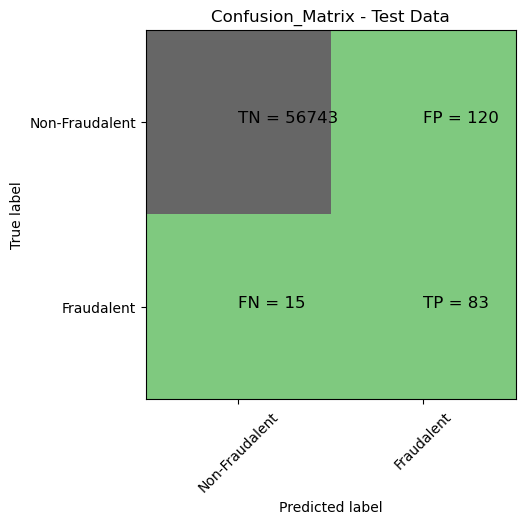

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.85      0.55        98

    accuracy                           1.00     56961
   macro avg       0.70      0.92      0.78     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of logistic model with l1 regulation : 0.9982795245869981
Confusion Matrix


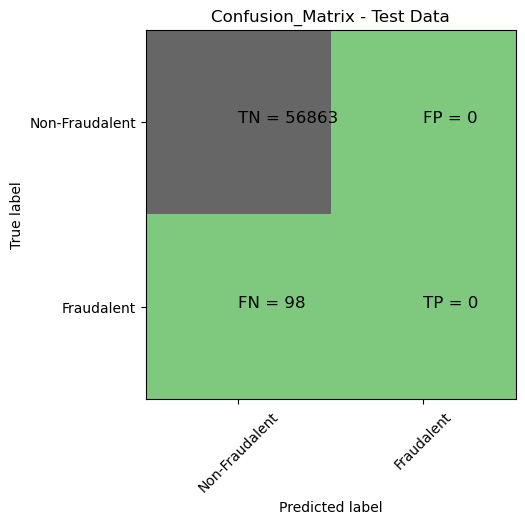

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9811522466996401
l2 threshold: 0.030742404759672534
ROC for the test dataset 98.1%


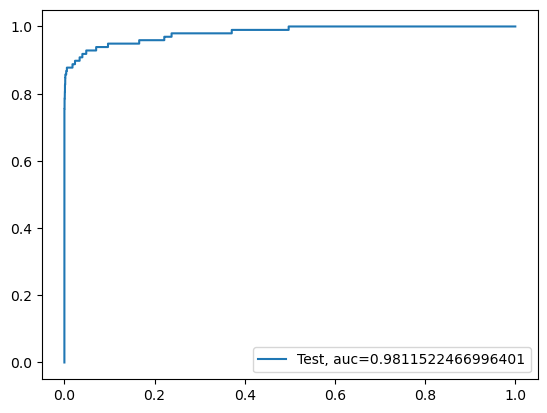

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


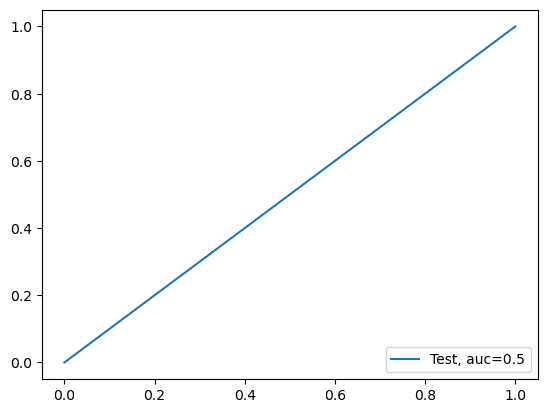

Time Taken by model:--- 5829.207051992416 seconds ---
------------------------------------------------------------
KNN model
model score
0.996541493302435
Confusion matrix


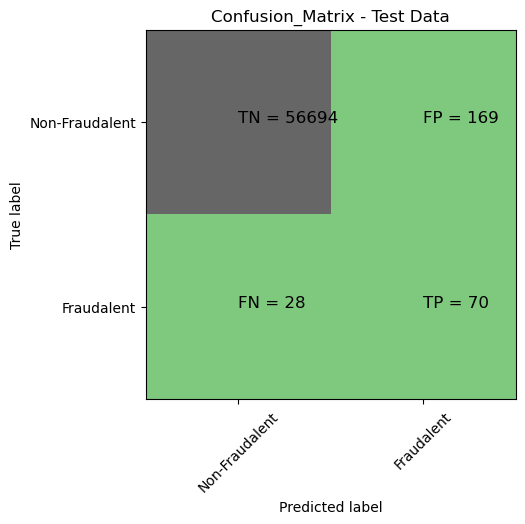

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.29      0.71      0.42        98

    accuracy                           1.00     56961
   macro avg       0.65      0.86      0.71     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8713223906941389
KNN threshold: 0.2
ROC for the test dataset 87.1%


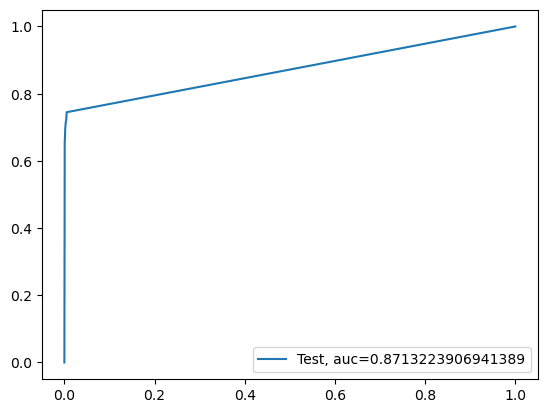

Time Taken by model:--- 9595.414842128754 seconds ---
------------------------------------------------------------
Decision tree model with 'gini' & 'entropy' criteria
giniscore: 0.9985253067888555
Confusion matrix


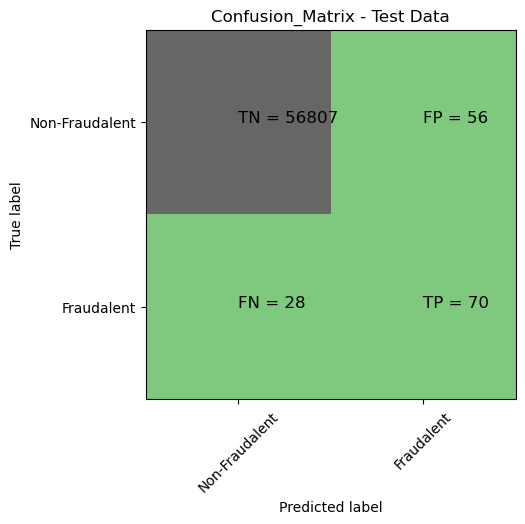

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.56      0.71      0.63        98

    accuracy                           1.00     56961
   macro avg       0.78      0.86      0.81     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.8566504455571161
Tree threshold: 1.0
ROC for the test dataset 85.7%


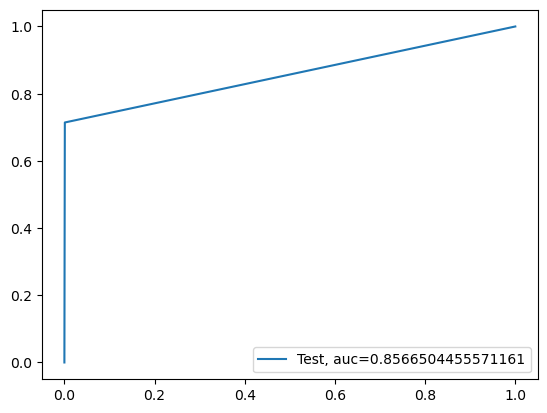

entropyscore: 0.9987886448622741
Confusion matrix


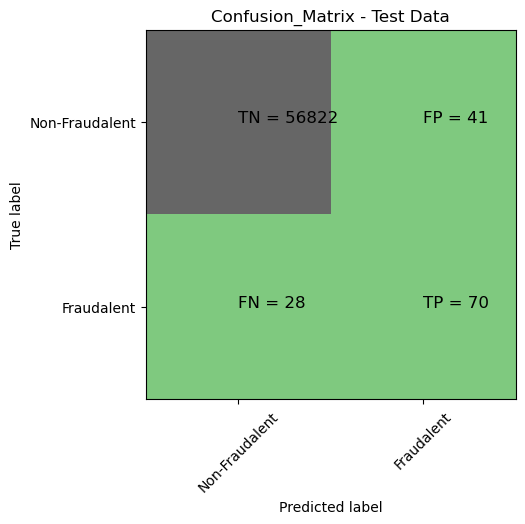

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.63      0.71      0.67        98

    accuracy                           1.00     56961
   macro avg       0.82      0.86      0.83     56961
weighted avg       1.00      1.00      1.00     56961

entropytree_roc_value: 0.8567823415175824
Tree threshold: 1.0
ROC for the test dataset 85.7%


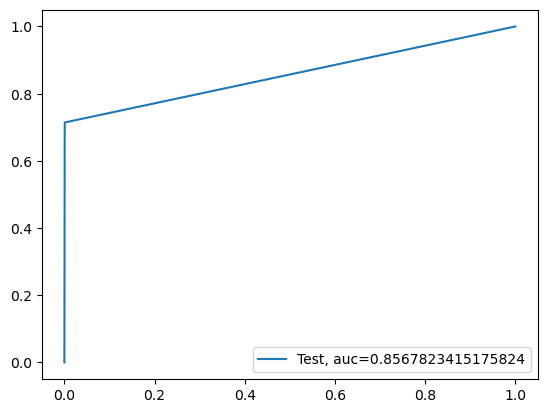

Time Taken by model:--- 133.1348843574524 seconds ---
------------------------------------------------------------
random forest model
Model Accuracy: 0.9995435473394076
Confusion matrix


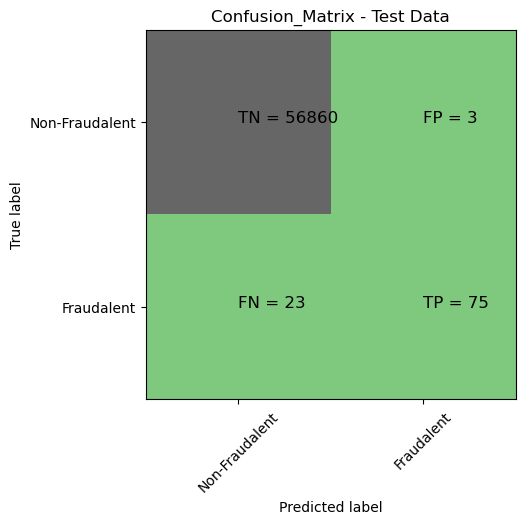

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.77      0.85        98

    accuracy                           1.00     56961
   macro avg       0.98      0.88      0.93     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9543507183574411
Random Forest threshold: 0.03
ROC for the test dataset 95.4%


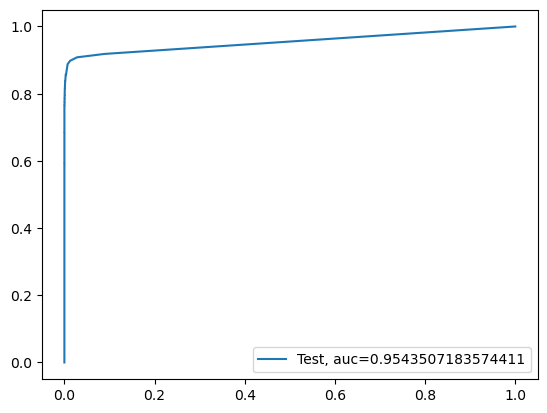

Time Taken by model:--- 651.4513773918152 seconds ---
------------------------------------------------------------
XGBoost model
Model Accuracy: 0.9994557679816014
Confusion matrix


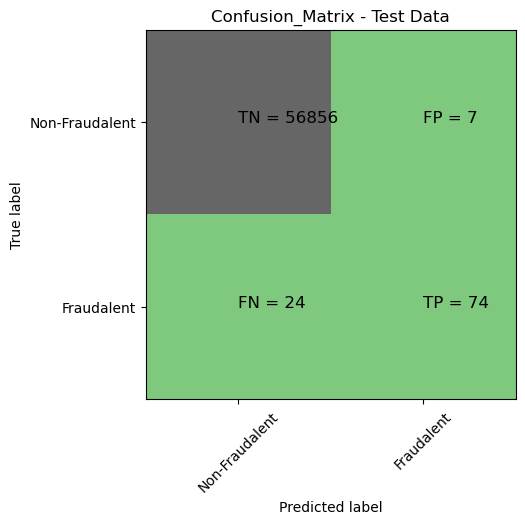

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.91      0.76      0.83        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9825447809217069
XGBoost threshold: 6.382895662682131e-05
ROC for the test dataset 98.3%


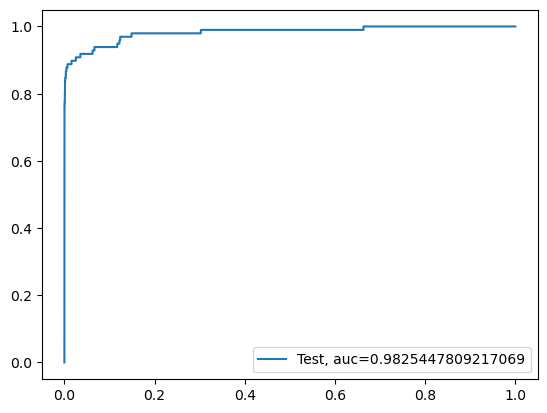

Time Taken by model:--- 452.61758041381836 seconds ---
------------------------------------------------------------


In [47]:
Data_Imbalance_Handiling = "SMOTE"
print("logistic regresssion with l1 and l2 regulation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,Data_Imbalance_Handiling, x_train_Smote, y_train_Smote, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("KNN model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,Data_Imbalance_Handiling,  x_train_Smote, y_train_Smote, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("Decision tree model with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,Data_Imbalance_Handiling, x_train_Smote, y_train_Smote, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("random forest model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,Data_Imbalance_Handiling, x_train_Smote, y_train_Smote, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("XGBoost model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,Data_Imbalance_Handiling, x_train_Smote, y_train_Smote, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)



In [48]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,Repeated Cross Validation,Logistic Regression with L2 Regulation,0.999157,0.990320,0.002426
1,Repeated Cross Validation,Logistic Regression with L1 Regulation,0.999140,0.894363,0.120013
2,Repeated Cross Validation,KNN,0.999280,0.877549,0.200000
3,Repeated Cross Validation,Tree Model with gini criteria,0.999070,0.905239,1.000000
4,Repeated Cross Validation,Tree Model with entropy criteria,0.999245,0.921967,1.000000
5,Repeated Cross Validation,Random Forest,0.999596,0.942797,0.370000
6,Repeated Cross Validation,XGBoost,0.999666,0.981567,0.000121
7,Repeated Cross Validation,SVM,0.998438,0.482279,0.002327
8,Stratified Cross Validation,Logistic Regression with L2 Regulation,0.998771,0.983336,0.001584
9,Stratified Cross Validation,Logistic Regression with L1 Regulation,0.998736,0.878921,0.022582


In [49]:
from sklearn.model_selection import StratifiedKFold 
from imblearn import over_sampling
skf = StratifiedKFold (n_splits=5, random_state=None)
for fold, (train_index, test_index) in enumerate(skf.split(x,y), 1):
    x_train = x.loc[train_index]
    y_train= y.loc[train_index]
    x_test= x.loc[test_index]
    y_test= y.loc[test_index]
    ADASYN = over_sampling.ADASYN(random_state=0)
    x_train_ADASYN, y_train_ADASYN=ADASYN. fit_resample(x_train, y_train)
x_train_ADASYN = pd.DataFrame(data=x_train_ADASYN, columns=cols)

logistic regresssion with l1 and l2 regulation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.9882858830252598
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0

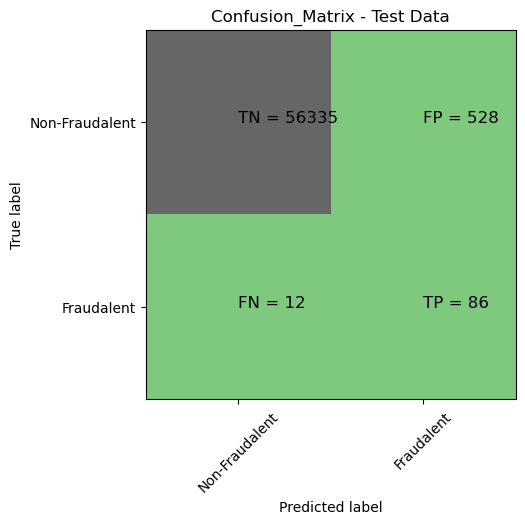

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.14      0.88      0.24        98

    accuracy                           0.99     56961
   macro avg       0.57      0.93      0.62     56961
weighted avg       1.00      0.99      0.99     56961

Accuarcy of logistic model with l1 regulation : 0.9982795245869981
Confusion Matrix


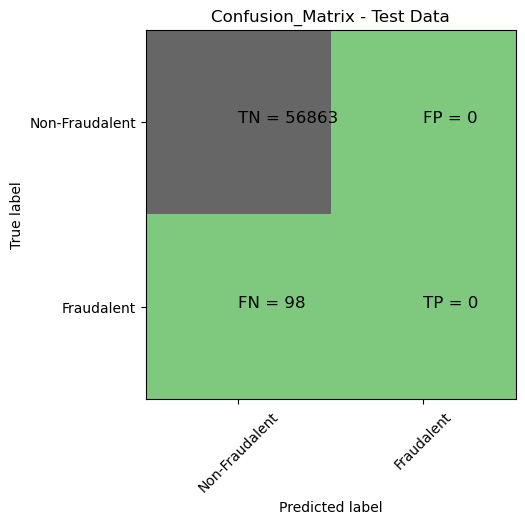

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9831819191633884
l2 threshold: 0.05754801101979426
ROC for the test dataset 98.3%


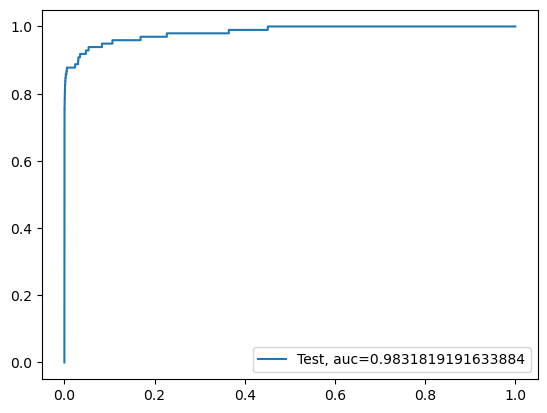

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


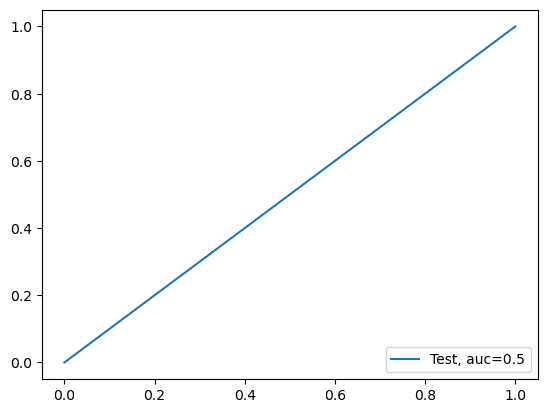

Time Taken by model:--- 642.5414714813232 seconds ---
------------------------------------------------------------
KNN model
model score
0.9961903758712102
Confusion matrix


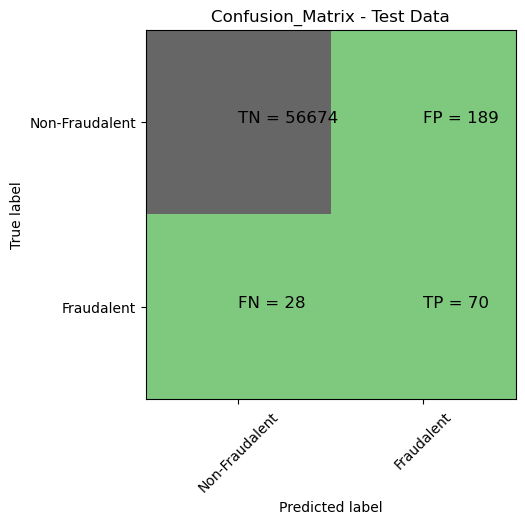

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.27      0.71      0.39        98

    accuracy                           1.00     56961
   macro avg       0.63      0.86      0.70     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8712549173864718
KNN threshold: 0.2
ROC for the test dataset 87.1%


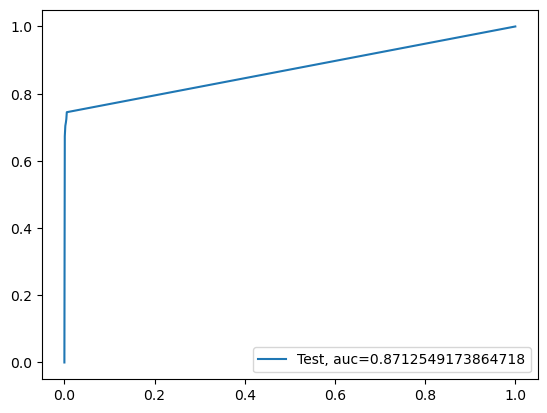

Time Taken by model:--- 2569.4185557365417 seconds ---
------------------------------------------------------------
Decision tree model with 'gini' & 'entropy' criteria
giniscore: 0.9983673039448043
Confusion matrix


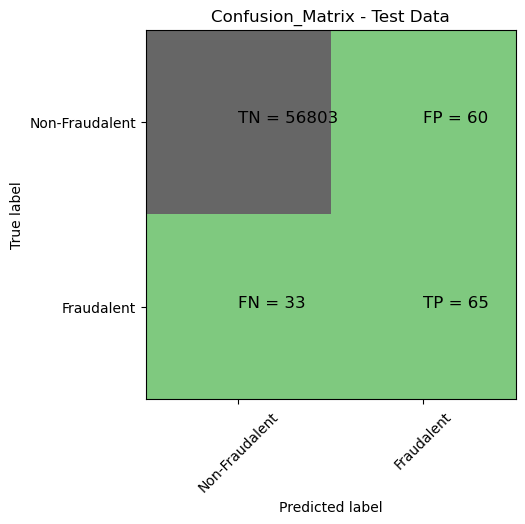

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.52      0.66      0.58        98

    accuracy                           1.00     56961
   macro avg       0.76      0.83      0.79     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.8311050692193589
Tree threshold: 1.0
ROC for the test dataset 83.1%


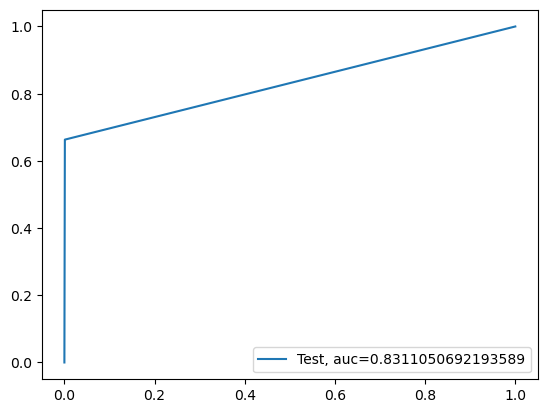

entropyscore: 0.9987886448622741
Confusion matrix


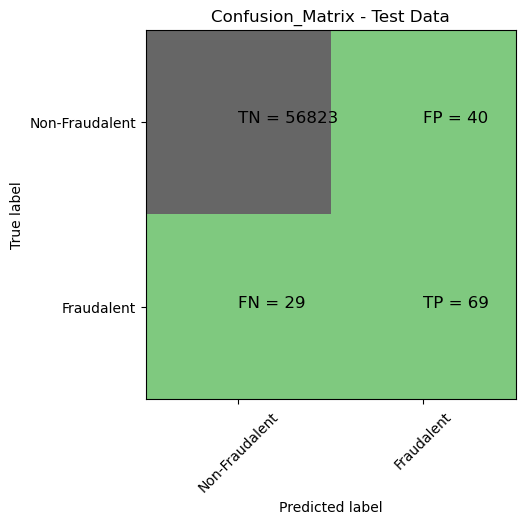

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.63      0.70      0.67        98

    accuracy                           1.00     56961
   macro avg       0.82      0.85      0.83     56961
weighted avg       1.00      1.00      1.00     56961

entropytree_roc_value: 0.8516890937652869
Tree threshold: 1.0
ROC for the test dataset 85.2%


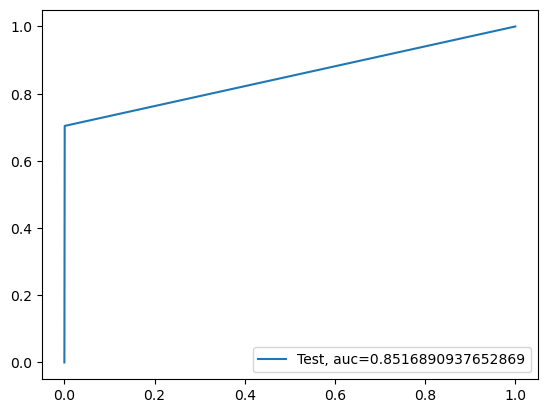

Time Taken by model:--- 61.75055956840515 seconds ---
------------------------------------------------------------
random forest model
Model Accuracy: 0.9995259914678464
Confusion matrix


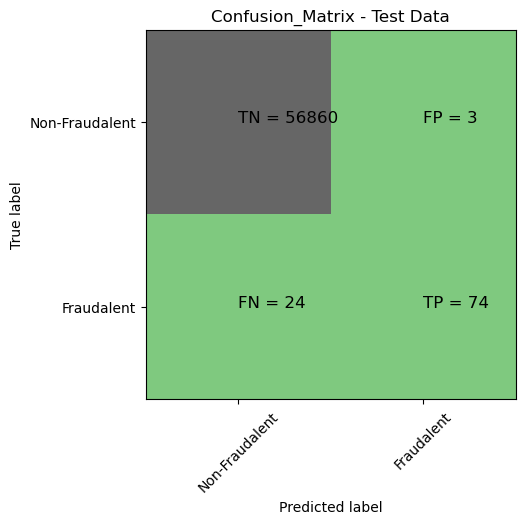

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56961
   macro avg       0.98      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9493541045843448
Random Forest threshold: 0.03
ROC for the test dataset 94.9%


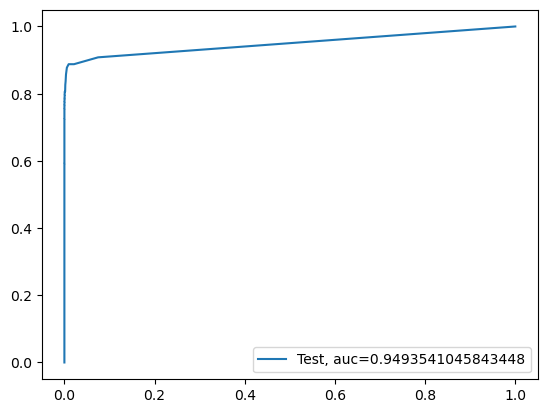

Time Taken by model:--- 295.0270781517029 seconds ---
------------------------------------------------------------
XGBoost model
Model Accuracy: 0.9994382121100402
Confusion matrix


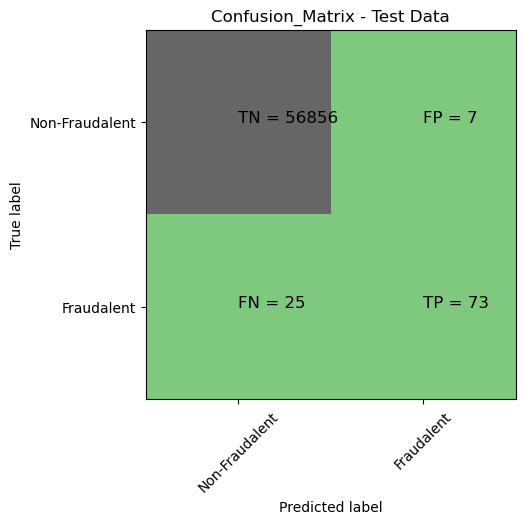

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.91      0.74      0.82        98

    accuracy                           1.00     56961
   macro avg       0.96      0.87      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9744561489896768
XGBoost threshold: 0.0001503707026131451
ROC for the test dataset 97.4%


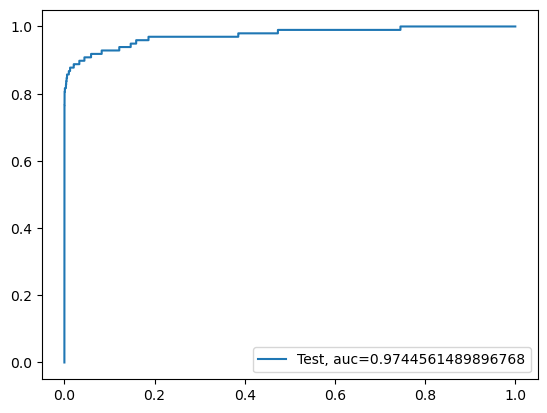

Time Taken by model:--- 91.05778813362122 seconds ---
------------------------------------------------------------


In [50]:
Data_Imbalance_Handiling = "ADASYN"
print("logistic regresssion with l1 and l2 regulation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,Data_Imbalance_Handiling, x_train_ADASYN, y_train_ADASYN, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("KNN model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,Data_Imbalance_Handiling,  x_train_ADASYN, y_train_ADASYN, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("Decision tree model with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,Data_Imbalance_Handiling, x_train_ADASYN, y_train_ADASYN, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("random forest model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,Data_Imbalance_Handiling, x_train_ADASYN, y_train_ADASYN, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

print("XGBoost model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,Data_Imbalance_Handiling, x_train_ADASYN, y_train_ADASYN, x_test, y_test)
print("Time Taken by model:--- %s seconds ---" % (time.time() - start_time))
print('-'*60)

In [51]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,Repeated Cross Validation,Logistic Regression with L2 Regulation,0.999157,0.990320,0.002426
1,Repeated Cross Validation,Logistic Regression with L1 Regulation,0.999140,0.894363,0.120013
2,Repeated Cross Validation,KNN,0.999280,0.877549,0.200000
3,Repeated Cross Validation,Tree Model with gini criteria,0.999070,0.905239,1.000000
4,Repeated Cross Validation,Tree Model with entropy criteria,0.999245,0.921967,1.000000
5,Repeated Cross Validation,Random Forest,0.999596,0.942797,0.370000
6,Repeated Cross Validation,XGBoost,0.999666,0.981567,0.000121
7,Repeated Cross Validation,SVM,0.998438,0.482279,0.002327
8,Stratified Cross Validation,Logistic Regression with L2 Regulation,0.998771,0.983336,0.001584
9,Stratified Cross Validation,Logistic Regression with L1 Regulation,0.998736,0.878921,0.022582


In [61]:
#hyper parameterization of XGBoost with randomoversampling

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_test={
   'max_depth':range(3,10,2),
   'min_child_weight':range(1,6,2),
   'n_estimators':range(60,130,150),
   'learning_rate':[0.05,0.1,0.125,0.15,0.2],
   'gamma':[i/10 for i in range(0,5)],
   'subsample':[i/10.0 for i in range(0,5)],
   'colsample_bytree':[i/10.0 for i in range(7,10)]
}
gsearch1 = RandomizedSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1,max_delta_step=0,
             missing=None, n_jobs=-1,
             nthread=None, objective='binary:logistic', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, 
             silent=None, verbosity=1), 
             param_distributions = param_test, n_iter=5, scoring='roc_auc',n_jobs=-1, cv=5)

gsearch1.fit(x_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([331.04745593,  84.9461833 , 281.97525506, 360.57683311,
          72.64428868]),
  'std_fit_time': array([  7.97839539,   2.2591741 , 136.94603346,  72.71836715,
           7.73633455]),
  'mean_score_time': array([0.33188167, 0.61262913, 0.264082  , 0.07540398, 0.13142242]),
  'std_score_time': array([0.13798829, 0.15130351, 0.16417326, 0.0536199 , 0.05720028]),
  'param_subsample': masked_array(data=[0.3, 0.2, 0.4, 0.3, 0.0],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_n_estimators': masked_array(data=[60, 60, 60, 60, 60],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 1, 5, 1, 5],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_max_depth': masked_array(data=[7, 5, 5, 5, 9],
               mask=[False

In [ ]:
#XGBoost with hyper
from xgboost import XGBClassifier
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                   colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
                   learning_rate=0.125, max_delta_step=0, max_depth=7,
                   min_child_weight=5, missing=None, n_estimators=60, n_jobs=1,
                   ntread=None, objective='binary:logistic', random_state=42,
                   reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                   silent=None, subsample=0.8, verbosity=1)

#fit on tranning dataset
clf.fit(x_over, y_over)
y_pred = clf.predict(x_test)
XGB_test_score = clf.score(x_test, y_test)

print('Model Accuracy: {0}'.format(XGB_test_score))

#probabilities for each class
XGB_probs = clf.predict_proba(x_test)[:, 1]

#calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGBoost roc_value: {0}".format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

In [63]:
imp_var = []
for i in clf.feature_importances_:
    imp_var.append(i)
print('Top var =', imp_var.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd var =', imp_var.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd var =', imp_var.index(np.sort(clf.feature_importances_)[-3])+1)

Top var = 14
2nd var = 17
3rd var = 10


In [65]:
 #calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGBoost roc_value: {0}".format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

NameError: name 'XGB_probs' is not defined

At first we made 6 models after that we used cross validation techniques and found the best among them after that we used methods with over sampling because the data which we got was highly imbalanced and for getting the correct and the proper output the data has to be balanced so for that we use over sampling method so that we can balance the data. After using oversamping method we concluded that with cross validation method stratified kfold and with over sampling random over sampling with XG boost shows as the most accurate accurate and precise decision so for making or model more efficient we used hyper parameterization technique on both of our models logistic regression with stratified kold and random over sampling with XG boost both of our model shows accuracy over 99 percentage.

We created all the models and techniques with the help of the functions so that we need not right code again and again and we can use the same piece of code again for any other model building this help us to reduce the lines of court and increase the code reusability again.